<a href="https://colab.research.google.com/github/Luis-Alves2/DataScience-IF697/blob/main/ALUNOSGDI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imports


In [354]:
import pandas as pd
import numpy as np

In [355]:
from google.colab import drive
drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [356]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 105)

#Alunos

http://dados.recife.pe.gov.br/es_AR/dataset/censo-escolar-2020/resource/6d9b3998-85fd-4c8a-9ec2-9932b9e5b90d?inner_span=True&filters=

##1 . Realizando download e analizando dados básicos do banco de dados

In [357]:
Dataset = pd.read_csv('/content/drive/MyDrive/minhapasta/alunos.csv', sep=';')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (40,41,42,43,44,45,46,47,48,49,50,53,54,55,56,57,58,59,60,61,62,63,92) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [358]:
Dataset.head()

,NU_ANO_CENSO,ID_ALUNO,ID_MATRICULA,NU_MES,NU_ANO,NU_IDADE_REFERENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,CO_PAIS_ORIGEM,CO_UF_NASC,CO_MUNICIPIO_NASC,CO_UF_END,CO_MUNICIPIO_END,TP_ZONA_RESIDENCIAL,TP_LOCAL_RESID_DIFERENCIADA,IN_NECESSIDADE_ESPECIAL,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_DEF_AUDITIVA,IN_DEF_FISICA,IN_DEF_INTELECTUAL,IN_SURDEZ,IN_SURDOCEGUEIRA,IN_DEF_MULTIPLA,IN_AUTISMO,IN_SUPERDOTACAO,IN_RECURSO_LEDOR,IN_RECURSO_TRANSCRICAO,IN_RECURSO_INTERPRETE,IN_RECURSO_LIBRAS,IN_RECURSO_LABIAL,IN_RECURSO_AMPLIADA_18,IN_RECURSO_AMPLIADA_24,IN_RECURSO_CD_AUDIO,IN_RECURSO_PROVA_PORTUGUES,IN_RECURSO_VIDEO_LIBRAS,IN_RECURSO_BRAILLE,IN_RECURSO_NENHUM,IN_AEE_LIBRAS,IN_AEE_LINGUA_PORTUGUESA,IN_AEE_INFORMATICA_ACESSIVEL,IN_AEE_BRAILLE,IN_AEE_CAA,IN_AEE_SOROBAN,IN_AEE_VIDA_AUTONOMA,IN_AEE_OPTICOS_NAO_OPTICOS,IN_AEE_ENRIQ_CURRICULAR,IN_AEE_DESEN_COGNITIVO,IN_AEE_MOBILIDADE,TP_OUTRO_LOCAL_AULA,IN_TRANSPORTE_PUBLICO,TP_RESPONSAVEL_TRANSPORTE,IN_TRANSP_BICICLETA,IN_TRANSP_MICRO_ONIBUS,IN_TRANSP_ONIBUS,IN_TRANSP_TR_ANIMAL,IN_TRANSP_VANS_KOMBI,IN_TRANSP_OUTRO_VEICULO,IN_TRANSP_EMBAR_ATE5,IN_TRANSP_EMBAR_5A15,IN_TRANSP_EMBAR_15A35,IN_TRANSP_EMBAR_35,TP_ETAPA_ENSINO,IN_ESPECIAL_EXCLUSIVA,IN_REGULAR,IN_EJA,IN_PROFISSIONALIZANTE,ID_TURMA,CO_CURSO_EDUC_PROFISSIONAL,TP_MEDIACAO_DIDATICO_PEDAGO,NU_DURACAO_TURMA,NU_DUR_ATIV_COMP_MESMA_REDE,NU_DUR_ATIV_COMP_OUTRAS_REDES,NU_DUR_AEE_MESMA_REDE,NU_DUR_AEE_OUTRAS_REDES,NU_DIAS_ATIVIDADE,TP_UNIFICADA,TP_TIPO_ATENDIMENTO_TURMA,TP_TIPO_LOCAL_TURMA,CO_ENTIDADE,CO_REGIAO,CO_MESORREGIAO,CO_MICRORREGIAO,CO_UF,CO_MUNICIPIO,CO_DISTRITO,TP_DEPENDENCIA,TP_LOCALIZACAO,TP_CATEGORIA_ESCOLA_PRIVADA,IN_CONVENIADA_PP,TP_CONVENIO_PODER_PUBLICO,IN_MANT_ESCOLA_PRIVADA_EMP,IN_MANT_ESCOLA_PRIVADA_ONG,IN_MANT_ESCOLA_PRIVADA_OSCIP,IN_MANT_ESCOLA_PRIV_ONG_OSCIP,IN_MANT_ESCOLA_PRIVADA_SIND,IN_MANT_ESCOLA_PRIVADA_SIST_S,IN_MANT_ESCOLA_PRIVADA_S_FINS,TP_REGULAMENTACAO,TP_LOCALIZACAO_DIFERENCIADA,IN_EDUCACAO_INDIGENA
0,2020,790269B39914035DE33BCB827C4F2D83,435039863,12,2009,10,11,2,3,1,76,26.0,2611606.0,26.0,2611606.0,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0,0.0,1.0,0.0,0.0,16608193,NaN,1,240.0,0.0,0.0,0.0,0.0,5.0,0.0,1,0.0,26125447,2,2605,26017,26,2611606,261160605,4,1,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0
1,2020,311363D9AB845EB53D7D6F12FE657CF9,351780516,6,2008,11,12,2,1,1,76,26.0,2611606.0,26.0,2611606.0,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0,0.0,1.0,0.0,0.0,18884068,NaN,1,270.0,0.0,0.0,0.0,0.0,5.0,0.0,1,0.0,26143186,2,2605,26017,26,2611606,261160605,4,1,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0
2,2020,0CFD8C53003C50D16BC9DE8E1CAFF658,419928618,4,2008,12,12,2,1,1,76,26.0,2611606.0,26.0,2611606.0,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,0.0,1.0,0.0,0.0,15523710,NaN,1,260.0,0.0,0.0,0.0,0.0,5.0,0.0,1,0.0,26120968,2,2605,26017,26,2611606,261160605,4,1,4.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0
3,2020,D295E28AA9D03AC4586E93B822E86C93,422248877,6,2017,2,3,1,3,1,76,26.0,2607901.0,26.0,2611606.0,1,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,0.0,19791994,NaN,1,240.0,0.0,0.0,0.0,0.0,5.0,0.0,1,0.0,26187400,2,2605,26017,26,2611606,261160605,4,1,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0
4,2020,44066D73C8A75DD9611F8272BE80AC74,404705028,5,2013,7,7,1,1,1,76,26.0,2611606.0,26.0,2606408.0,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [359]:
Dataset.shape

(371059, 103)

## 2.2 Tratamento de dados faltantes


###Análise dados faltantes

In [360]:
print(Dataset.isnull().sum())

NU_ANO_CENSO                          0
ID_ALUNO                              0
ID_MATRICULA                          0
NU_MES                                0
NU_ANO                                0
NU_IDADE_REFERENCIA                   0
NU_IDADE                              0
TP_SEXO                               0
TP_COR_RACA                           0
TP_NACIONALIDADE                      0
CO_PAIS_ORIGEM                        0
CO_UF_NASC                          590
CO_MUNICIPIO_NASC                   590
CO_UF_END                         69103
CO_MUNICIPIO_END                  69103
TP_ZONA_RESIDENCIAL                   0
TP_LOCAL_RESID_DIFERENCIADA      230973
IN_NECESSIDADE_ESPECIAL               0
IN_BAIXA_VISAO                   360436
IN_CEGUEIRA                      360436
IN_DEF_AUDITIVA                  360436
IN_DEF_FISICA                    360436
IN_DEF_INTELECTUAL               360436
IN_SURDEZ                        360436
IN_SURDOCEGUEIRA                 360436


Análise de dados faltantes através do dicionário:

CO_UF_NASC                          590

CO_MUNICIPIO_NASC                   590

   - Não aplicável para alunos de nacionalidade estrangeira
   - Substituir NA por valor 

CO_UF_END                         69103

CO_MUNICIPIO_END                  69103

  - FALTANTES
  - INPUTAR DADOS

TP_LOCAL_RESID_DIFERENCIADA      230973

  - NÃO EXPLICADO EM DICIONÁRIO
  - Exclusão dos dados

De
IN_BAIXA_VISAO                   360436

a

IN_AEE_MOBILIDADE                368649

 - SEM DEFICIENCIA SEM ENTRADA, FICA NULL
 - Substituir NA por valor 

IN_TRANSPORTE_PUBLICO             40846

  - NÃO APLICÁVEL PARA ALUNOS EM TURMAS DE EAD
  - Substituir NA por valor 

De
TP_RESPONSAVEL_TRANSPORTE        370753

a IN_TRANSP_EMBAR_35               370753

  - NÃO APLICÁVEL PARA ALUNOS EM TURMAS DE EAD
  - Substituir NA por valor 

De
TP_ETAPA_ENSINO                    3735

a IN_PROFISSIONALIZANTE           3735

  - FALTANTES
  - INPUTAR DADOS

CO_CURSO_EDUC_PROFISSIONAL       309813

  - Não aplicável para alunos em turmas que não são de educação profissional
  - Seria realizada a substituição de valores, porem após análise dos valores disponiveís, foi dispensado.

NU_DURACAO_TURMA                  40846
E

NU_DIAS_ATIVIDADE                 40846

  - Não aplicável para alunos em turmas de EAD
  - Substituir NA por valor 

NU_DUR_ATIV_COMP_MESMA_REDE        3735

A

NU_DUR_AEE_OUTRAS_REDES            3735

  - Não aplicável para alunos em turmas de EAD
  - Substituir NA por valor 

TP_UNIFICADA                       3735

  - FALTANTES
  - EXCLUSÃO

TP_TIPO_LOCAL_TURMA               40846

 - NÃO APLICÁVEL PARA ALUNOS EM TURMAS DE EAD
 - Substituir NA por valor 

De 
TP_CATEGORIA_ESCOLA_PRIVADA      242025

A IN_MANT_ESCOLA_PRIVADA_S_FINS    242025 

  - NÃO APLICÁVEL PARA ESCOLAS PÚBLICAS
  - Substituir NA por valor 

Resolução : eliminação de dados faltantes, preenchimento de dados incorretamente assinalados NA.

In [361]:
print(Dataset['TP_CONVENIO_PODER_PUBLICO'].unique())

print(len(Dataset['TP_CONVENIO_PODER_PUBLICO'].unique()))

[nan 'Y']
2


TP_CONVENIO_PODER_PUBLICO        369530

Após análise no dicionário, percebe-se que os dados estão preenchidos incorretamnete, aqui sendo objetos (Y ou N), quando deveriam ser valores numéricos. Logo essa coluna será excluída

###Dropagens

Após análises, todas as 3735 entradas nas colunas TP_UNIFICADA, IN_ESPECIAL_EXCLUSIVA, IN_REGULAR, IN_EJA, IN_PROFISSIONALIZANTE, NU_DUR_ATIV_COMP_MESMA_REDE, NU_DUR_ATIV_COMP_OUTRAS_REDES, NU_DUR_AEE_MESMA_REDE e NU_DUR_AEE_OUTRAS_REDES  se tratavam dos mesmos dados, por isso, foi optada a eliminação dessas linhas.


In [362]:
Dataset = Dataset[Dataset.TP_UNIFICADA.notnull()]

In [363]:
Dataset[Dataset['TP_UNIFICADA'].isnull()]

,NU_ANO_CENSO,ID_ALUNO,ID_MATRICULA,NU_MES,NU_ANO,NU_IDADE_REFERENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,CO_PAIS_ORIGEM,CO_UF_NASC,CO_MUNICIPIO_NASC,CO_UF_END,CO_MUNICIPIO_END,TP_ZONA_RESIDENCIAL,TP_LOCAL_RESID_DIFERENCIADA,IN_NECESSIDADE_ESPECIAL,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_DEF_AUDITIVA,IN_DEF_FISICA,IN_DEF_INTELECTUAL,IN_SURDEZ,IN_SURDOCEGUEIRA,IN_DEF_MULTIPLA,IN_AUTISMO,IN_SUPERDOTACAO,IN_RECURSO_LEDOR,IN_RECURSO_TRANSCRICAO,IN_RECURSO_INTERPRETE,IN_RECURSO_LIBRAS,IN_RECURSO_LABIAL,IN_RECURSO_AMPLIADA_18,IN_RECURSO_AMPLIADA_24,IN_RECURSO_CD_AUDIO,IN_RECURSO_PROVA_PORTUGUES,IN_RECURSO_VIDEO_LIBRAS,IN_RECURSO_BRAILLE,IN_RECURSO_NENHUM,IN_AEE_LIBRAS,IN_AEE_LINGUA_PORTUGUESA,IN_AEE_INFORMATICA_ACESSIVEL,IN_AEE_BRAILLE,IN_AEE_CAA,IN_AEE_SOROBAN,IN_AEE_VIDA_AUTONOMA,IN_AEE_OPTICOS_NAO_OPTICOS,IN_AEE_ENRIQ_CURRICULAR,IN_AEE_DESEN_COGNITIVO,IN_AEE_MOBILIDADE,TP_OUTRO_LOCAL_AULA,IN_TRANSPORTE_PUBLICO,TP_RESPONSAVEL_TRANSPORTE,IN_TRANSP_BICICLETA,IN_TRANSP_MICRO_ONIBUS,IN_TRANSP_ONIBUS,IN_TRANSP_TR_ANIMAL,IN_TRANSP_VANS_KOMBI,IN_TRANSP_OUTRO_VEICULO,IN_TRANSP_EMBAR_ATE5,IN_TRANSP_EMBAR_5A15,IN_TRANSP_EMBAR_15A35,IN_TRANSP_EMBAR_35,TP_ETAPA_ENSINO,IN_ESPECIAL_EXCLUSIVA,IN_REGULAR,IN_EJA,IN_PROFISSIONALIZANTE,ID_TURMA,CO_CURSO_EDUC_PROFISSIONAL,TP_MEDIACAO_DIDATICO_PEDAGO,NU_DURACAO_TURMA,NU_DUR_ATIV_COMP_MESMA_REDE,NU_DUR_ATIV_COMP_OUTRAS_REDES,NU_DUR_AEE_MESMA_REDE,NU_DUR_AEE_OUTRAS_REDES,NU_DIAS_ATIVIDADE,TP_UNIFICADA,TP_TIPO_ATENDIMENTO_TURMA,TP_TIPO_LOCAL_TURMA,CO_ENTIDADE,CO_REGIAO,CO_MESORREGIAO,CO_MICRORREGIAO,CO_UF,CO_MUNICIPIO,CO_DISTRITO,TP_DEPENDENCIA,TP_LOCALIZACAO,TP_CATEGORIA_ESCOLA_PRIVADA,IN_CONVENIADA_PP,TP_CONVENIO_PODER_PUBLICO,IN_MANT_ESCOLA_PRIVADA_EMP,IN_MANT_ESCOLA_PRIVADA_ONG,IN_MANT_ESCOLA_PRIVADA_OSCIP,IN_MANT_ESCOLA_PRIV_ONG_OSCIP,IN_MANT_ESCOLA_PRIVADA_SIND,IN_MANT_ESCOLA_PRIVADA_SIST_S,IN_MANT_ESCOLA_PRIVADA_S_FINS,TP_REGULAMENTACAO,TP_LOCALIZACAO_DIFERENCIADA,IN_EDUCACAO_INDIGENA


In [364]:
print(Dataset.isnull().sum())

NU_ANO_CENSO                          0
ID_ALUNO                              0
ID_MATRICULA                          0
NU_MES                                0
NU_ANO                                0
NU_IDADE_REFERENCIA                   0
NU_IDADE                              0
TP_SEXO                               0
TP_COR_RACA                           0
TP_NACIONALIDADE                      0
CO_PAIS_ORIGEM                        0
CO_UF_NASC                          585
CO_MUNICIPIO_NASC                   585
CO_UF_END                         68367
CO_MUNICIPIO_END                  68367
TP_ZONA_RESIDENCIAL                   0
TP_LOCAL_RESID_DIFERENCIADA      230288
IN_NECESSIDADE_ESPECIAL               0
IN_BAIXA_VISAO                   359131
IN_CEGUEIRA                      359131
IN_DEF_AUDITIVA                  359131
IN_DEF_FISICA                    359131
IN_DEF_INTELECTUAL               359131
IN_SURDEZ                        359131
IN_SURDOCEGUEIRA                 359131


In [365]:
Dataset[Dataset['TP_ETAPA_ENSINO'].isnull()]

,NU_ANO_CENSO,ID_ALUNO,ID_MATRICULA,NU_MES,NU_ANO,NU_IDADE_REFERENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,CO_PAIS_ORIGEM,CO_UF_NASC,CO_MUNICIPIO_NASC,CO_UF_END,CO_MUNICIPIO_END,TP_ZONA_RESIDENCIAL,TP_LOCAL_RESID_DIFERENCIADA,IN_NECESSIDADE_ESPECIAL,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_DEF_AUDITIVA,IN_DEF_FISICA,IN_DEF_INTELECTUAL,IN_SURDEZ,IN_SURDOCEGUEIRA,IN_DEF_MULTIPLA,IN_AUTISMO,IN_SUPERDOTACAO,IN_RECURSO_LEDOR,IN_RECURSO_TRANSCRICAO,IN_RECURSO_INTERPRETE,IN_RECURSO_LIBRAS,IN_RECURSO_LABIAL,IN_RECURSO_AMPLIADA_18,IN_RECURSO_AMPLIADA_24,IN_RECURSO_CD_AUDIO,IN_RECURSO_PROVA_PORTUGUES,IN_RECURSO_VIDEO_LIBRAS,IN_RECURSO_BRAILLE,IN_RECURSO_NENHUM,IN_AEE_LIBRAS,IN_AEE_LINGUA_PORTUGUESA,IN_AEE_INFORMATICA_ACESSIVEL,IN_AEE_BRAILLE,IN_AEE_CAA,IN_AEE_SOROBAN,IN_AEE_VIDA_AUTONOMA,IN_AEE_OPTICOS_NAO_OPTICOS,IN_AEE_ENRIQ_CURRICULAR,IN_AEE_DESEN_COGNITIVO,IN_AEE_MOBILIDADE,TP_OUTRO_LOCAL_AULA,IN_TRANSPORTE_PUBLICO,TP_RESPONSAVEL_TRANSPORTE,IN_TRANSP_BICICLETA,IN_TRANSP_MICRO_ONIBUS,IN_TRANSP_ONIBUS,IN_TRANSP_TR_ANIMAL,IN_TRANSP_VANS_KOMBI,IN_TRANSP_OUTRO_VEICULO,IN_TRANSP_EMBAR_ATE5,IN_TRANSP_EMBAR_5A15,IN_TRANSP_EMBAR_15A35,IN_TRANSP_EMBAR_35,TP_ETAPA_ENSINO,IN_ESPECIAL_EXCLUSIVA,IN_REGULAR,IN_EJA,IN_PROFISSIONALIZANTE,ID_TURMA,CO_CURSO_EDUC_PROFISSIONAL,TP_MEDIACAO_DIDATICO_PEDAGO,NU_DURACAO_TURMA,NU_DUR_ATIV_COMP_MESMA_REDE,NU_DUR_ATIV_COMP_OUTRAS_REDES,NU_DUR_AEE_MESMA_REDE,NU_DUR_AEE_OUTRAS_REDES,NU_DIAS_ATIVIDADE,TP_UNIFICADA,TP_TIPO_ATENDIMENTO_TURMA,TP_TIPO_LOCAL_TURMA,CO_ENTIDADE,CO_REGIAO,CO_MESORREGIAO,CO_MICRORREGIAO,CO_UF,CO_MUNICIPIO,CO_DISTRITO,TP_DEPENDENCIA,TP_LOCALIZACAO,TP_CATEGORIA_ESCOLA_PRIVADA,IN_CONVENIADA_PP,TP_CONVENIO_PODER_PUBLICO,IN_MANT_ESCOLA_PRIVADA_EMP,IN_MANT_ESCOLA_PRIVADA_ONG,IN_MANT_ESCOLA_PRIVADA_OSCIP,IN_MANT_ESCOLA_PRIV_ONG_OSCIP,IN_MANT_ESCOLA_PRIVADA_SIND,IN_MANT_ESCOLA_PRIVADA_SIST_S,IN_MANT_ESCOLA_PRIVADA_S_FINS,TP_REGULAMENTACAO,TP_LOCALIZACAO_DIFERENCIADA,IN_EDUCACAO_INDIGENA


In [366]:
Dataset.drop("TP_LOCAL_RESID_DIFERENCIADA", axis=1, inplace=True)

In [367]:
print(Dataset['CO_CURSO_EDUC_PROFISSIONAL'].unique())

print(len(Dataset['CO_CURSO_EDUC_PROFISSIONAL'].unique()))

[nan 'N']
2


Como só temos duas opções para 'CO_CURSO_EDUC_PROFISSIONAL', a unica resposta sendo 'N' (não), eliminamos a coluna.

In [368]:
Dataset.drop("CO_CURSO_EDUC_PROFISSIONAL", axis=1, inplace=True)

In [369]:
Dataset.drop("TP_CONVENIO_PODER_PUBLICO", axis=1, inplace=True)

### Substituição de NA's por valores válidos.

In [370]:
print(Dataset['CO_UF_NASC'].unique())

print(len(Dataset['CO_MUNICIPIO_NASC'].unique()))


[26. 23. 35. 53. 24. 15. nan 29. 27. 21. 41. 16. 33. 25. 11. 43. 31. 42.
 22. 13. 50. 51. 14. 28. 52. 32. 12. 17.]
1389


In [371]:
Dataset['CO_UF_NASC'] = Dataset['CO_UF_NASC'].fillna(-1)

In [372]:
Dataset['CO_MUNICIPIO_NASC'] = Dataset['CO_MUNICIPIO_NASC'].fillna(-1)

In [373]:
print(Dataset['IN_BAIXA_VISAO'].unique())

print(Dataset['IN_AEE_CAA'].unique())


[nan  0.  1.]
[nan]


In [374]:
listadeficiencias = ['IN_BAIXA_VISAO',
 'IN_CEGUEIRA',
 'IN_DEF_AUDITIVA',
 'IN_DEF_FISICA',
 'IN_DEF_INTELECTUAL',
 'IN_SURDEZ',
 'IN_SURDOCEGUEIRA',
 'IN_DEF_MULTIPLA',
 'IN_AUTISMO',
 'IN_SUPERDOTACAO',
 'IN_RECURSO_LEDOR',
 'IN_RECURSO_TRANSCRICAO',
 'IN_RECURSO_INTERPRETE',
 'IN_RECURSO_LIBRAS',
 'IN_RECURSO_LABIAL',
 'IN_RECURSO_AMPLIADA_18',
 'IN_RECURSO_AMPLIADA_24',
 'IN_RECURSO_CD_AUDIO',
 'IN_RECURSO_PROVA_PORTUGUES',
 'IN_RECURSO_VIDEO_LIBRAS',
 'IN_RECURSO_BRAILLE',
 'IN_RECURSO_NENHUM',
 'IN_AEE_LIBRAS',
 'IN_AEE_LINGUA_PORTUGUESA',
 'IN_AEE_INFORMATICA_ACESSIVEL',
 'IN_AEE_BRAILLE',
 'IN_AEE_CAA',
 'IN_AEE_SOROBAN',
 'IN_AEE_VIDA_AUTONOMA',
 'IN_AEE_OPTICOS_NAO_OPTICOS',
 'IN_AEE_ENRIQ_CURRICULAR',
 'IN_AEE_DESEN_COGNITIVO',
 'IN_AEE_MOBILIDADE']

for x in listadeficiencias:
  #print(x)
  Dataset[x] = Dataset[x].fillna(-1)

In [375]:
print(Dataset['TP_RESPONSAVEL_TRANSPORTE'].unique())

print(Dataset['IN_TRANSP_EMBAR_5A15'].unique())


[nan 'N' 'Y']
[nan 'N']


In [376]:
listadetransportes = ['TP_RESPONSAVEL_TRANSPORTE',
 'IN_TRANSP_BICICLETA',
 'IN_TRANSP_MICRO_ONIBUS',
 'IN_TRANSP_ONIBUS',
 'IN_TRANSP_TR_ANIMAL',
 'IN_TRANSP_VANS_KOMBI',
 'IN_TRANSP_OUTRO_VEICULO',
 'IN_TRANSP_EMBAR_ATE5',
 'IN_TRANSP_EMBAR_5A15',
 'IN_TRANSP_EMBAR_15A35',
 'IN_TRANSP_EMBAR_35']

for x in listadetransportes:
  #print(x)
  Dataset[x] = Dataset[x].fillna('TRANSPPRIV')

Dataset['IN_TRANSPORTE_PUBLICO'] = Dataset['IN_TRANSPORTE_PUBLICO'].fillna(-1)

In [377]:
print(Dataset['NU_DURACAO_TURMA'].unique())

print(Dataset['NU_DIAS_ATIVIDADE'].unique())

print(Dataset['TP_TIPO_LOCAL_TURMA'].unique())


[240. 270. 260. 285. 290. 195.  nan 255. 250. 265. 300. 245. 420. 280.
 340. 600. 345. 320. 230. 210. 310. 330. 200. 380. 180. 335. 275. 315.
 325. 305. 225. 295. 680. 540. 360. 570. 450. 460. 350. 510. 365. 355.
 390. 370. 120. 190. 235. 630. 660. 375. 720. 140. 620. 610. 585. 220.
 580. 445. 500. 470. 690. 520. 530. 480. 170.]
[ 5.  3. nan  6.  2.  4.  1.]
[ 0. nan  1.  3.]


In [378]:
Dataset['NU_DURACAO_TURMA'] = Dataset['NU_DURACAO_TURMA'].fillna(-1)

Dataset['NU_DIAS_ATIVIDADE'] = Dataset['NU_DIAS_ATIVIDADE'].fillna(-1)

Dataset['TP_TIPO_LOCAL_TURMA'] = Dataset['TP_TIPO_LOCAL_TURMA'].fillna(-1)

In [379]:
print(Dataset['TP_CATEGORIA_ESCOLA_PRIVADA'].unique())

print(Dataset['IN_MANT_ESCOLA_PRIVADA_OSCIP'].unique())

print(Dataset['IN_MANT_ESCOLA_PRIVADA_S_FINS'].unique())


[ 1.  4. nan  2.  3.]
[ 0. nan  1.]
[ 0.  1. nan]


In [380]:
listaescolaspriv = ['TP_CATEGORIA_ESCOLA_PRIVADA', 
 'IN_CONVENIADA_PP',
 'IN_MANT_ESCOLA_PRIVADA_EMP',
 'IN_MANT_ESCOLA_PRIVADA_ONG',
 'IN_MANT_ESCOLA_PRIVADA_OSCIP',
 'IN_MANT_ESCOLA_PRIV_ONG_OSCIP',
 'IN_MANT_ESCOLA_PRIVADA_SIND',
 'IN_MANT_ESCOLA_PRIVADA_SIST_S',
 'IN_MANT_ESCOLA_PRIVADA_S_FINS']


for x in listaescolaspriv:
  #print(x)
  Dataset[x] = Dataset[x].fillna(-1)

In [381]:
Dataset.describe()

,NU_ANO_CENSO,ID_MATRICULA,NU_MES,NU_ANO,NU_IDADE_REFERENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,CO_PAIS_ORIGEM,CO_UF_NASC,CO_MUNICIPIO_NASC,CO_UF_END,CO_MUNICIPIO_END,TP_ZONA_RESIDENCIAL,IN_NECESSIDADE_ESPECIAL,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_DEF_AUDITIVA,IN_DEF_FISICA,IN_DEF_INTELECTUAL,IN_SURDEZ,IN_SURDOCEGUEIRA,IN_DEF_MULTIPLA,IN_AUTISMO,IN_SUPERDOTACAO,IN_RECURSO_LEDOR,IN_RECURSO_TRANSCRICAO,IN_RECURSO_INTERPRETE,IN_RECURSO_LIBRAS,IN_RECURSO_LABIAL,IN_RECURSO_AMPLIADA_18,IN_RECURSO_AMPLIADA_24,IN_RECURSO_CD_AUDIO,IN_RECURSO_PROVA_PORTUGUES,IN_RECURSO_VIDEO_LIBRAS,IN_RECURSO_BRAILLE,IN_RECURSO_NENHUM,IN_AEE_LIBRAS,IN_AEE_LINGUA_PORTUGUESA,IN_AEE_INFORMATICA_ACESSIVEL,IN_AEE_BRAILLE,IN_AEE_CAA,IN_AEE_SOROBAN,IN_AEE_VIDA_AUTONOMA,IN_AEE_OPTICOS_NAO_OPTICOS,IN_AEE_ENRIQ_CURRICULAR,IN_AEE_DESEN_COGNITIVO,IN_AEE_MOBILIDADE,TP_OUTRO_LOCAL_AULA,IN_TRANSPORTE_PUBLICO,TP_ETAPA_ENSINO,IN_ESPECIAL_EXCLUSIVA,IN_REGULAR,IN_EJA,IN_PROFISSIONALIZANTE,ID_TURMA,TP_MEDIACAO_DIDATICO_PEDAGO,NU_DURACAO_TURMA,NU_DUR_ATIV_COMP_MESMA_REDE,NU_DUR_ATIV_COMP_OUTRAS_REDES,NU_DUR_AEE_MESMA_REDE,NU_DUR_AEE_OUTRAS_REDES,NU_DIAS_ATIVIDADE,TP_UNIFICADA,TP_TIPO_ATENDIMENTO_TURMA,TP_TIPO_LOCAL_TURMA,CO_ENTIDADE,CO_REGIAO,CO_MESORREGIAO,CO_MICRORREGIAO,CO_UF,CO_MUNICIPIO,CO_DISTRITO,TP_DEPENDENCIA,TP_LOCALIZACAO,TP_CATEGORIA_ESCOLA_PRIVADA,IN_CONVENIADA_PP,IN_MANT_ESCOLA_PRIVADA_EMP,IN_MANT_ESCOLA_PRIVADA_ONG,IN_MANT_ESCOLA_PRIVADA_OSCIP,IN_MANT_ESCOLA_PRIV_ONG_OSCIP,IN_MANT_ESCOLA_PRIVADA_SIND,IN_MANT_ESCOLA_PRIVADA_SIST_S,IN_MANT_ESCOLA_PRIVADA_S_FINS,TP_REGULAMENTACAO,TP_LOCALIZACAO_DIFERENCIADA,IN_EDUCACAO_INDIGENA
count,367324.0,3.673240e+05,367324.000000,367324.000000,367324.000000,367324.000000,367324.000000,367324.000000,367324.000000,367324.000000,367324.000000,3.673240e+05,298957.000000,2.989570e+05,367324.000000,367324.000000,367324.000000,367324.000000,367324.000000,367324.000000,367324.000000,367324.000000,367324.000000,367324.000000,367324.000000,367324.000000,367324.000000,367324.00000,367324.000000,367324.000000,367324.000000,367324.000000,367324.000000,367324.000000,367324.000000,367324.000000,367324.000000,367324.000000,367324.0,367324.0,367324.0,367324.0,367324.0,367324.0,367324.0,367324.0,367324.0,367324.0,367324.0,367324.000000,367324.000000,367324.000000,367324.000000,367324.000000,367324.000000,367324.000000,3.673240e+05,367324.000000,367324.000000,367324.000000,367324.000000,367324.000000,367324.000000,367324.000000,367324.000000,367324.000000,367324.000000,3.673240e+05,367324.0,367324.0,367324.0,367324.0,367324.0,367324.0,367324.000000,367324.0,367324.000000,367324.000000,367324.000000,367324.000000,367324.000000,367324.000000,367324.000000,367324.000000,367324.000000,367324.000000,367324.0,367324.0
mean,2020.0,3.904521e+08,6.430127,2005.326317,14.100690,14.673683,1.505913,1.553370,1.002333,76.354883,26.098744,2.621222e+06,26.024953,2.613479e+06,1.010949,0.022305,-0.976802,-0.977562,-0.977113,-0.975654,-0.964446,-0.976922,-0.977690,-0.976604,-0.971238,-0.977388,-0.968649,-0.97050,-0.972131,-0.971439,-0.972087,-0.972049,-0.972006,-0.972112,-0.972131,-0.972131,-0.972095,-0.955568,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,2.999608,-0.110366,24.458680,0.000544,0.793087,0.052850,0.167158,1.670825e+07,1.222398,266.953967,0.331816,0.017598,1.111463,0.043291,4.314469,0.070251,1.000945,-0.102738,2.615427e+07,2.0,2605.0,26017.0,26.0,2611606.0,261160605.0,2.935828,1.0,-0.238261,-0.644997,-0.350029,-0.648811,-0.648757,-0.648757,-0.641303,-0.637723,-0.606473,1.052469,0.0,0.0
std,0.0,7.110993e+07,3.393968,9.384915,9.382575,9.384915,0.499966,1.341677,0.061714,15.221885,1.969069,1.961982e+05,0.976123,9.763967e+04,0.104065,0.147672,0.156350,0.149001,0.153390,0.166845,0.246557,0.155214,0.147727,0.158216,0.202114,0.150719,0.304887,0.29583,0.287605,0.291122,0.287828,0.288023,0.288245,0.287702,0.287605,0.287605,0.287786,0.362227,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.023563,0.315993,15.966768,0.023328,0.405093,0.223734,0.3731

In [382]:
listadecolunas = list(Dataset.columns)

print(listadecolunas)

['NU_ANO_CENSO', 'ID_ALUNO', 'ID_MATRICULA', 'NU_MES', 'NU_ANO', 'NU_IDADE_REFERENCIA', 'NU_IDADE', 'TP_SEXO', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'CO_PAIS_ORIGEM', 'CO_UF_NASC', 'CO_MUNICIPIO_NASC', 'CO_UF_END', 'CO_MUNICIPIO_END', 'TP_ZONA_RESIDENCIAL', 'IN_NECESSIDADE_ESPECIAL', 'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_DEF_AUDITIVA', 'IN_DEF_FISICA', 'IN_DEF_INTELECTUAL', 'IN_SURDEZ', 'IN_SURDOCEGUEIRA', 'IN_DEF_MULTIPLA', 'IN_AUTISMO', 'IN_SUPERDOTACAO', 'IN_RECURSO_LEDOR', 'IN_RECURSO_TRANSCRICAO', 'IN_RECURSO_INTERPRETE', 'IN_RECURSO_LIBRAS', 'IN_RECURSO_LABIAL', 'IN_RECURSO_AMPLIADA_18', 'IN_RECURSO_AMPLIADA_24', 'IN_RECURSO_CD_AUDIO', 'IN_RECURSO_PROVA_PORTUGUES', 'IN_RECURSO_VIDEO_LIBRAS', 'IN_RECURSO_BRAILLE', 'IN_RECURSO_NENHUM', 'IN_AEE_LIBRAS', 'IN_AEE_LINGUA_PORTUGUESA', 'IN_AEE_INFORMATICA_ACESSIVEL', 'IN_AEE_BRAILLE', 'IN_AEE_CAA', 'IN_AEE_SOROBAN', 'IN_AEE_VIDA_AUTONOMA', 'IN_AEE_OPTICOS_NAO_OPTICOS', 'IN_AEE_ENRIQ_CURRICULAR', 'IN_AEE_DESEN_COGNITIVO', 'IN_AEE_MOBILIDADE',

In [383]:
Dataset.shape

(367324, 100)

### Inputação de dados

In [384]:
CO_UF_END_moda = Dataset['CO_UF_END'].mode()
CO_UF_END_moda

0    26.0
dtype: float64

In [385]:
Dataset.loc[Dataset['CO_UF_END'].isnull(), ['CO_UF_END']] = 26.0

Dataset[Dataset['CO_UF_END'].isnull()]

,NU_ANO_CENSO,ID_ALUNO,ID_MATRICULA,NU_MES,NU_ANO,NU_IDADE_REFERENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,CO_PAIS_ORIGEM,CO_UF_NASC,CO_MUNICIPIO_NASC,CO_UF_END,CO_MUNICIPIO_END,TP_ZONA_RESIDENCIAL,IN_NECESSIDADE_ESPECIAL,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_DEF_AUDITIVA,IN_DEF_FISICA,IN_DEF_INTELECTUAL,IN_SURDEZ,IN_SURDOCEGUEIRA,IN_DEF_MULTIPLA,IN_AUTISMO,IN_SUPERDOTACAO,IN_RECURSO_LEDOR,IN_RECURSO_TRANSCRICAO,IN_RECURSO_INTERPRETE,IN_RECURSO_LIBRAS,IN_RECURSO_LABIAL,IN_RECURSO_AMPLIADA_18,IN_RECURSO_AMPLIADA_24,IN_RECURSO_CD_AUDIO,IN_RECURSO_PROVA_PORTUGUES,IN_RECURSO_VIDEO_LIBRAS,IN_RECURSO_BRAILLE,IN_RECURSO_NENHUM,IN_AEE_LIBRAS,IN_AEE_LINGUA_PORTUGUESA,IN_AEE_INFORMATICA_ACESSIVEL,IN_AEE_BRAILLE,IN_AEE_CAA,IN_AEE_SOROBAN,IN_AEE_VIDA_AUTONOMA,IN_AEE_OPTICOS_NAO_OPTICOS,IN_AEE_ENRIQ_CURRICULAR,IN_AEE_DESEN_COGNITIVO,IN_AEE_MOBILIDADE,TP_OUTRO_LOCAL_AULA,IN_TRANSPORTE_PUBLICO,TP_RESPONSAVEL_TRANSPORTE,IN_TRANSP_BICICLETA,IN_TRANSP_MICRO_ONIBUS,IN_TRANSP_ONIBUS,IN_TRANSP_TR_ANIMAL,IN_TRANSP_VANS_KOMBI,IN_TRANSP_OUTRO_VEICULO,IN_TRANSP_EMBAR_ATE5,IN_TRANSP_EMBAR_5A15,IN_TRANSP_EMBAR_15A35,IN_TRANSP_EMBAR_35,TP_ETAPA_ENSINO,IN_ESPECIAL_EXCLUSIVA,IN_REGULAR,IN_EJA,IN_PROFISSIONALIZANTE,ID_TURMA,TP_MEDIACAO_DIDATICO_PEDAGO,NU_DURACAO_TURMA,NU_DUR_ATIV_COMP_MESMA_REDE,NU_DUR_ATIV_COMP_OUTRAS_REDES,NU_DUR_AEE_MESMA_REDE,NU_DUR_AEE_OUTRAS_REDES,NU_DIAS_ATIVIDADE,TP_UNIFICADA,TP_TIPO_ATENDIMENTO_TURMA,TP_TIPO_LOCAL_TURMA,CO_ENTIDADE,CO_REGIAO,CO_MESORREGIAO,CO_MICRORREGIAO,CO_UF,CO_MUNICIPIO,CO_DISTRITO,TP_DEPENDENCIA,TP_LOCALIZACAO,TP_CATEGORIA_ESCOLA_PRIVADA,IN_CONVENIADA_PP,IN_MANT_ESCOLA_PRIVADA_EMP,IN_MANT_ESCOLA_PRIVADA_ONG,IN_MANT_ESCOLA_PRIVADA_OSCIP,IN_MANT_ESCOLA_PRIV_ONG_OSCIP,IN_MANT_ESCOLA_PRIVADA_SIND,IN_MANT_ESCOLA_PRIVADA_SIST_S,IN_MANT_ESCOLA_PRIVADA_S_FINS,TP_REGULAMENTACAO,TP_LOCALIZACAO_DIFERENCIADA,IN_EDUCACAO_INDIGENA


In [386]:
CO_MUN_END_moda = Dataset['CO_MUNICIPIO_END'].mode()
CO_MUN_END_moda

0    2611606.0
dtype: float64

In [387]:
Dataset.loc[Dataset['CO_MUNICIPIO_END'].isnull(), ['CO_MUNICIPIO_END']] = 2611606.0

Dataset[Dataset['CO_MUNICIPIO_END'].isnull()]

,NU_ANO_CENSO,ID_ALUNO,ID_MATRICULA,NU_MES,NU_ANO,NU_IDADE_REFERENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,CO_PAIS_ORIGEM,CO_UF_NASC,CO_MUNICIPIO_NASC,CO_UF_END,CO_MUNICIPIO_END,TP_ZONA_RESIDENCIAL,IN_NECESSIDADE_ESPECIAL,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_DEF_AUDITIVA,IN_DEF_FISICA,IN_DEF_INTELECTUAL,IN_SURDEZ,IN_SURDOCEGUEIRA,IN_DEF_MULTIPLA,IN_AUTISMO,IN_SUPERDOTACAO,IN_RECURSO_LEDOR,IN_RECURSO_TRANSCRICAO,IN_RECURSO_INTERPRETE,IN_RECURSO_LIBRAS,IN_RECURSO_LABIAL,IN_RECURSO_AMPLIADA_18,IN_RECURSO_AMPLIADA_24,IN_RECURSO_CD_AUDIO,IN_RECURSO_PROVA_PORTUGUES,IN_RECURSO_VIDEO_LIBRAS,IN_RECURSO_BRAILLE,IN_RECURSO_NENHUM,IN_AEE_LIBRAS,IN_AEE_LINGUA_PORTUGUESA,IN_AEE_INFORMATICA_ACESSIVEL,IN_AEE_BRAILLE,IN_AEE_CAA,IN_AEE_SOROBAN,IN_AEE_VIDA_AUTONOMA,IN_AEE_OPTICOS_NAO_OPTICOS,IN_AEE_ENRIQ_CURRICULAR,IN_AEE_DESEN_COGNITIVO,IN_AEE_MOBILIDADE,TP_OUTRO_LOCAL_AULA,IN_TRANSPORTE_PUBLICO,TP_RESPONSAVEL_TRANSPORTE,IN_TRANSP_BICICLETA,IN_TRANSP_MICRO_ONIBUS,IN_TRANSP_ONIBUS,IN_TRANSP_TR_ANIMAL,IN_TRANSP_VANS_KOMBI,IN_TRANSP_OUTRO_VEICULO,IN_TRANSP_EMBAR_ATE5,IN_TRANSP_EMBAR_5A15,IN_TRANSP_EMBAR_15A35,IN_TRANSP_EMBAR_35,TP_ETAPA_ENSINO,IN_ESPECIAL_EXCLUSIVA,IN_REGULAR,IN_EJA,IN_PROFISSIONALIZANTE,ID_TURMA,TP_MEDIACAO_DIDATICO_PEDAGO,NU_DURACAO_TURMA,NU_DUR_ATIV_COMP_MESMA_REDE,NU_DUR_ATIV_COMP_OUTRAS_REDES,NU_DUR_AEE_MESMA_REDE,NU_DUR_AEE_OUTRAS_REDES,NU_DIAS_ATIVIDADE,TP_UNIFICADA,TP_TIPO_ATENDIMENTO_TURMA,TP_TIPO_LOCAL_TURMA,CO_ENTIDADE,CO_REGIAO,CO_MESORREGIAO,CO_MICRORREGIAO,CO_UF,CO_MUNICIPIO,CO_DISTRITO,TP_DEPENDENCIA,TP_LOCALIZACAO,TP_CATEGORIA_ESCOLA_PRIVADA,IN_CONVENIADA_PP,IN_MANT_ESCOLA_PRIVADA_EMP,IN_MANT_ESCOLA_PRIVADA_ONG,IN_MANT_ESCOLA_PRIVADA_OSCIP,IN_MANT_ESCOLA_PRIV_ONG_OSCIP,IN_MANT_ESCOLA_PRIVADA_SIND,IN_MANT_ESCOLA_PRIVADA_SIST_S,IN_MANT_ESCOLA_PRIVADA_S_FINS,TP_REGULAMENTACAO,TP_LOCALIZACAO_DIFERENCIADA,IN_EDUCACAO_INDIGENA


In [388]:
print(Dataset.isnull().sum())

NU_ANO_CENSO                     0
ID_ALUNO                         0
ID_MATRICULA                     0
NU_MES                           0
NU_ANO                           0
NU_IDADE_REFERENCIA              0
NU_IDADE                         0
TP_SEXO                          0
TP_COR_RACA                      0
TP_NACIONALIDADE                 0
CO_PAIS_ORIGEM                   0
CO_UF_NASC                       0
CO_MUNICIPIO_NASC                0
CO_UF_END                        0
CO_MUNICIPIO_END                 0
TP_ZONA_RESIDENCIAL              0
IN_NECESSIDADE_ESPECIAL          0
IN_BAIXA_VISAO                   0
IN_CEGUEIRA                      0
IN_DEF_AUDITIVA                  0
IN_DEF_FISICA                    0
IN_DEF_INTELECTUAL               0
IN_SURDEZ                        0
IN_SURDOCEGUEIRA                 0
IN_DEF_MULTIPLA                  0
IN_AUTISMO                       0
IN_SUPERDOTACAO                  0
IN_RECURSO_LEDOR                 0
IN_RECURSO_TRANSCRIC

##2.1 Definição de tipos

### Analizando categoria e redefinindo tipos

In [389]:
Dataset.dtypes

NU_ANO_CENSO                       int64
ID_ALUNO                          object
ID_MATRICULA                       int64
NU_MES                             int64
NU_ANO                             int64
NU_IDADE_REFERENCIA                int64
NU_IDADE                           int64
TP_SEXO                            int64
TP_COR_RACA                        int64
TP_NACIONALIDADE                   int64
CO_PAIS_ORIGEM                     int64
CO_UF_NASC                       float64
CO_MUNICIPIO_NASC                float64
CO_UF_END                        float64
CO_MUNICIPIO_END                 float64
TP_ZONA_RESIDENCIAL                int64
IN_NECESSIDADE_ESPECIAL            int64
IN_BAIXA_VISAO                   float64
IN_CEGUEIRA                      float64
IN_DEF_AUDITIVA                  float64
IN_DEF_FISICA                    float64
IN_DEF_INTELECTUAL               float64
IN_SURDEZ                        float64
IN_SURDOCEGUEIRA                 float64
IN_DEF_MULTIPLA 

In [390]:
print(Dataset['IN_TRANSPORTE_PUBLICO'].unique())

print(len(Dataset['IN_TRANSPORTE_PUBLICO'].unique()))

[ 0. -1.  1.]
3


In [391]:
list_floats_to_int = ['CO_UF_NASC',
'CO_MUNICIPIO_NASC',
'CO_UF_END',
'CO_MUNICIPIO_END',
'IN_BAIXA_VISAO',
'IN_CEGUEIRA',
'IN_DEF_AUDITIVA',
'IN_DEF_FISICA',
'IN_DEF_INTELECTUAL',
'IN_SURDEZ',
'IN_SURDOCEGUEIRA',
'IN_DEF_MULTIPLA',
'IN_AUTISMO',
'IN_SUPERDOTACAO',
'IN_RECURSO_LEDOR',
'IN_RECURSO_TRANSCRICAO',
'IN_RECURSO_INTERPRETE',
'IN_RECURSO_LIBRAS',
'IN_RECURSO_LABIAL',
'IN_RECURSO_AMPLIADA_18',
'IN_RECURSO_AMPLIADA_24',
'IN_RECURSO_CD_AUDIO',
'IN_RECURSO_PROVA_PORTUGUES',
'IN_RECURSO_VIDEO_LIBRAS',
'IN_RECURSO_BRAILLE',
'IN_RECURSO_NENHUM',
'IN_TRANSPORTE_PUBLICO',
'TP_ETAPA_ENSINO',
'IN_ESPECIAL_EXCLUSIVA',
'IN_REGULAR',
'IN_EJA',
'IN_PROFISSIONALIZANTE',
'NU_DURACAO_TURMA',
'NU_DUR_ATIV_COMP_MESMA_REDE',
'NU_DUR_ATIV_COMP_OUTRAS_REDES',
'NU_DUR_AEE_MESMA_REDE',
'NU_DUR_AEE_OUTRAS_REDES',
'NU_DIAS_ATIVIDADE',
'TP_UNIFICADA',
'TP_TIPO_LOCAL_TURMA',
'TP_CATEGORIA_ESCOLA_PRIVADA',
'IN_CONVENIADA_PP',
'IN_MANT_ESCOLA_PRIVADA_EMP',
'IN_MANT_ESCOLA_PRIVADA_ONG',
'IN_MANT_ESCOLA_PRIVADA_OSCIP',
'IN_MANT_ESCOLA_PRIV_ONG_OSCIP',
'IN_MANT_ESCOLA_PRIVADA_SIND',
'IN_MANT_ESCOLA_PRIVADA_SIST_S',
'IN_MANT_ESCOLA_PRIVADA_S_FINS']

for x in list_floats_to_int:
  Dataset[x] = Dataset[x].astype('int64')

In [392]:
#Mantendo valores indicativos de categoria int, como ints.

#Dataset['TP_MEDIACAO_DIDATICO_PEDAGO'] = Dataset['TP_MEDIACAO_DIDATICO_PEDAGO'].astype('category')
#Dataset['TP_ETAPA_ENSINO'] = Dataset['TP_ETAPA_ENSINO'].astype('category')
#Dataset['Marks'] = Dataset['Marks'].astype('category')
#Dataset['Marks'] = Dataset['Marks'].astype('category')

In [393]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 367324 entries, 0 to 371058
Data columns (total 100 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   NU_ANO_CENSO                   367324 non-null  int64 
 1   ID_ALUNO                       367324 non-null  object
 2   ID_MATRICULA                   367324 non-null  int64 
 3   NU_MES                         367324 non-null  int64 
 4   NU_ANO                         367324 non-null  int64 
 5   NU_IDADE_REFERENCIA            367324 non-null  int64 
 6   NU_IDADE                       367324 non-null  int64 
 7   TP_SEXO                        367324 non-null  int64 
 8   TP_COR_RACA                    367324 non-null  int64 
 9   TP_NACIONALIDADE               367324 non-null  int64 
 10  CO_PAIS_ORIGEM                 367324 non-null  int64 
 11  CO_UF_NASC                     367324 non-null  int64 
 12  CO_MUNICIPIO_NASC              367324 non-n

##Revisão Geral

In [394]:
Dataset.shape

(367324, 100)

In [395]:
Dataset.head()

,NU_ANO_CENSO,ID_ALUNO,ID_MATRICULA,NU_MES,NU_ANO,NU_IDADE_REFERENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,CO_PAIS_ORIGEM,CO_UF_NASC,CO_MUNICIPIO_NASC,CO_UF_END,CO_MUNICIPIO_END,TP_ZONA_RESIDENCIAL,IN_NECESSIDADE_ESPECIAL,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_DEF_AUDITIVA,IN_DEF_FISICA,IN_DEF_INTELECTUAL,IN_SURDEZ,IN_SURDOCEGUEIRA,IN_DEF_MULTIPLA,IN_AUTISMO,IN_SUPERDOTACAO,IN_RECURSO_LEDOR,IN_RECURSO_TRANSCRICAO,IN_RECURSO_INTERPRETE,IN_RECURSO_LIBRAS,IN_RECURSO_LABIAL,IN_RECURSO_AMPLIADA_18,IN_RECURSO_AMPLIADA_24,IN_RECURSO_CD_AUDIO,IN_RECURSO_PROVA_PORTUGUES,IN_RECURSO_VIDEO_LIBRAS,IN_RECURSO_BRAILLE,IN_RECURSO_NENHUM,IN_AEE_LIBRAS,IN_AEE_LINGUA_PORTUGUESA,IN_AEE_INFORMATICA_ACESSIVEL,IN_AEE_BRAILLE,IN_AEE_CAA,IN_AEE_SOROBAN,IN_AEE_VIDA_AUTONOMA,IN_AEE_OPTICOS_NAO_OPTICOS,IN_AEE_ENRIQ_CURRICULAR,IN_AEE_DESEN_COGNITIVO,IN_AEE_MOBILIDADE,TP_OUTRO_LOCAL_AULA,IN_TRANSPORTE_PUBLICO,TP_RESPONSAVEL_TRANSPORTE,IN_TRANSP_BICICLETA,IN_TRANSP_MICRO_ONIBUS,IN_TRANSP_ONIBUS,IN_TRANSP_TR_ANIMAL,IN_TRANSP_VANS_KOMBI,IN_TRANSP_OUTRO_VEICULO,IN_TRANSP_EMBAR_ATE5,IN_TRANSP_EMBAR_5A15,IN_TRANSP_EMBAR_15A35,IN_TRANSP_EMBAR_35,TP_ETAPA_ENSINO,IN_ESPECIAL_EXCLUSIVA,IN_REGULAR,IN_EJA,IN_PROFISSIONALIZANTE,ID_TURMA,TP_MEDIACAO_DIDATICO_PEDAGO,NU_DURACAO_TURMA,NU_DUR_ATIV_COMP_MESMA_REDE,NU_DUR_ATIV_COMP_OUTRAS_REDES,NU_DUR_AEE_MESMA_REDE,NU_DUR_AEE_OUTRAS_REDES,NU_DIAS_ATIVIDADE,TP_UNIFICADA,TP_TIPO_ATENDIMENTO_TURMA,TP_TIPO_LOCAL_TURMA,CO_ENTIDADE,CO_REGIAO,CO_MESORREGIAO,CO_MICRORREGIAO,CO_UF,CO_MUNICIPIO,CO_DISTRITO,TP_DEPENDENCIA,TP_LOCALIZACAO,TP_CATEGORIA_ESCOLA_PRIVADA,IN_CONVENIADA_PP,IN_MANT_ESCOLA_PRIVADA_EMP,IN_MANT_ESCOLA_PRIVADA_ONG,IN_MANT_ESCOLA_PRIVADA_OSCIP,IN_MANT_ESCOLA_PRIV_ONG_OSCIP,IN_MANT_ESCOLA_PRIVADA_SIND,IN_MANT_ESCOLA_PRIVADA_SIST_S,IN_MANT_ESCOLA_PRIVADA_S_FINS,TP_REGULAMENTACAO,TP_LOCALIZACAO_DIFERENCIADA,IN_EDUCACAO_INDIGENA
0,2020,790269B39914035DE33BCB827C4F2D83,435039863,12,2009,10,11,2,3,1,76,26,2611606,26,2611606,1,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,3,0,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,18,0,1,0,0,16608193,1,240,0,0,0,0,5,0,1,0,26125447,2,2605,26017,26,2611606,261160605,4,1,1,0,1,0,0,0,0,0,0,1,0,0
1,2020,311363D9AB845EB53D7D6F12FE657CF9,351780516,6,2008,11,12,2,1,1,76,26,2611606,26,2611606,1,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,3,0,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,19,0,1,0,0,18884068,1,270,0,0,0,0,5,0,1,0,26143186,2,2605,26017,26,2611606,261160605,4,1,1,0,1,0,0,0,0,0,0,1,0,0
2,2020,0CFD8C53003C50D16BC9DE8E1CAFF658,419928618,4,2008,12,12,2,1,1,76,26,2611606,26,2611606,1,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,3,0,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,16,0,1,0,0,15523710,1,260,0,0,0,0,5,0,1,0,26120968,2,2605,26017,26,2611606,261160605,4,1,4,0,1,0,0,0,0,0,1,1,0,0
3,2020,D295E28AA9D03AC4586E93B822E86C93,422248877,6,2017,2,3,1,3,1,76,26,2607901,26,2611606,1,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,3,0,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,1,0,1,0,0,19791994,1,240,0,0,0,0,5,0,1,0,26187400,2,2605,26017,26,2611606,261160605,4,1,1,0,1,0,0,0,0,0,0,1,0,0
4,2020,44066D73C8A75DD9611F8272BE80AC74,404705028,5,2013,7,7,1,1,1,76,26,2611606,26,2606408,1,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,3,0,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,14,0,1,0,0,16916869,1,240,0,0,0,0,5,0,1,0,26189500,2,2605,26017,26,2611606,

##2.3 Normalização e discretização

In [396]:
# nomarlizando entre 0 e 1
Dataset['NU_IDADE_norm'] = (Dataset['NU_IDADE'] - Dataset['NU_IDADE'].min()) / (Dataset['NU_IDADE'].max() - Dataset['NU_IDADE'].min())

In [397]:
Dataset['NU_IDADE_norm'].describe()

count    367324.000000
mean          0.168663
std           0.107873
min           0.000000
25%           0.103448
50%           0.149425
75%           0.195402
max           1.000000
Name: NU_IDADE_norm, dtype: float64

In [398]:
# discretizando com 10 bins com mesmo intervalo
Dataset['NU_IDADE_dist'] = pd.cut(Dataset['NU_IDADE'],10)

In [399]:
# discretizando com 4 bins com mesmo intervalo (quantiles)
Dataset['NU_IDADE_dist_quant'] = pd.qcut(Dataset['NU_IDADE'],4)

In [400]:
Dataset['NU_IDADE_dist'].value_counts()

(8.7, 17.4]      189341
(-0.087, 8.7]     91564
(17.4, 26.1]      53208
(26.1, 34.8]      14848
(34.8, 43.5]      10276
(43.5, 52.2]       5024
(52.2, 60.9]       2130
(60.9, 69.6]        751
(69.6, 78.3]        155
(78.3, 87.0]         27
Name: NU_IDADE_dist, dtype: int64

In [401]:
Dataset['NU_IDADE_dist_quant'].value_counts()

(-0.001, 9.0]    110271
(13.0, 17.0]      93186
(17.0, 87.0]      86419
(9.0, 13.0]       77448
Name: NU_IDADE_dist_quant, dtype: int64

##2.4 Limpeza de dados

### Separando o dataframe em dataframes menores 

In [402]:
#ALUNO GENERICO

Dataset_Info_Alunos = Dataset[['NU_ANO_CENSO',
 'ID_ALUNO',
 'ID_MATRICULA',
 'NU_MES',
 'NU_ANO',
 'NU_IDADE_REFERENCIA',
 'NU_IDADE',
 'TP_SEXO',
 'TP_COR_RACA',
 'TP_NACIONALIDADE',
 'CO_PAIS_ORIGEM',
 'CO_UF_NASC',
 'CO_MUNICIPIO_NASC',
 'CO_UF_END',
 'CO_MUNICIPIO_END',
 'TP_ZONA_RESIDENCIAL']].copy()

In [403]:
Dataset_Info_Alunos.describe()

,NU_ANO_CENSO,ID_MATRICULA,NU_MES,NU_ANO,NU_IDADE_REFERENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,CO_PAIS_ORIGEM,CO_UF_NASC,CO_MUNICIPIO_NASC,CO_UF_END,CO_MUNICIPIO_END,TP_ZONA_RESIDENCIAL
count,367324.0,3.673240e+05,367324.000000,367324.000000,367324.000000,367324.000000,367324.000000,367324.000000,367324.000000,367324.000000,367324.000000,3.673240e+05,367324.000000,3.673240e+05,367324.000000
mean,2020.0,3.904521e+08,6.430127,2005.326317,14.100690,14.673683,1.505913,1.553370,1.002333,76.354883,26.098744,2.621222e+06,26.020309,2.613130e+06,1.010949
std,0.0,7.110993e+07,3.393968,9.384915,9.382575,9.384915,0.499966,1.341677,0.061714,15.221885,1.969069,1.961982e+05,0.880664,8.808881e+04,0.104065
min,2020.0,1.622000e+03,1.000000,1933.000000,0.000000,0.000000,1.000000,0.000000,1.000000,20.000000,-1.000000,-1.000000e+00,11.000000,1.100049e+06,1.000000
25%,2020.0,3.883921e+08,4.000000,2003.000000,8.000000,9.000000,1.000000,0.000000,1.000000,76.000000,26.000000,2.611606e+06,26.000000,2.611606e+06,1.000000
50%,2020.0,4.098948e+08,6.000000,2007.000000,13.000000,13.000000,2.000000,1.000000,1.000000,76.000000,26.000000,2.611606e+06,26.000000,2.611606e+06,1.000000
75%,2020.0,4.235003e+08,9.000000,2011.000000,17.000000,17.000000,2.000000,3.000000,1.000000,76.000000,26.000000,2.611606e+06,26.000000,2.611606e+06,1.000000
max,2020.0,4.519327e+08,12.000000,2020.000000,86.000000,87.000000,2.000000,5.000000,3.000000,999.000000,53.000000,5.300108e+06,53.000000,5.300108e+06,2.000000


In [404]:
#NECESSIDADES TIPO IN_

Dataset_Info_IN = Dataset[['IN_NECESSIDADE_ESPECIAL',
 'IN_BAIXA_VISAO',
 'IN_CEGUEIRA',
 'IN_DEF_AUDITIVA',
 'IN_DEF_FISICA',
 'IN_DEF_INTELECTUAL',
 'IN_SURDEZ',
 'IN_SURDOCEGUEIRA',
 'IN_DEF_MULTIPLA',
 'IN_AUTISMO',
 'IN_SUPERDOTACAO',
 'IN_RECURSO_LEDOR',
 'IN_RECURSO_TRANSCRICAO',
 'IN_RECURSO_INTERPRETE',
 'IN_RECURSO_LIBRAS',
 'IN_RECURSO_LABIAL',
 'IN_RECURSO_AMPLIADA_18',
 'IN_RECURSO_AMPLIADA_24',
 'IN_RECURSO_CD_AUDIO',
 'IN_RECURSO_PROVA_PORTUGUES',
 'IN_RECURSO_VIDEO_LIBRAS',
 'IN_RECURSO_BRAILLE',
 'IN_RECURSO_NENHUM']].copy()

In [405]:
Dataset_Info_IN.describe()

,IN_NECESSIDADE_ESPECIAL,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_DEF_AUDITIVA,IN_DEF_FISICA,IN_DEF_INTELECTUAL,IN_SURDEZ,IN_SURDOCEGUEIRA,IN_DEF_MULTIPLA,IN_AUTISMO,IN_SUPERDOTACAO,IN_RECURSO_LEDOR,IN_RECURSO_TRANSCRICAO,IN_RECURSO_INTERPRETE,IN_RECURSO_LIBRAS,IN_RECURSO_LABIAL,IN_RECURSO_AMPLIADA_18,IN_RECURSO_AMPLIADA_24,IN_RECURSO_CD_AUDIO,IN_RECURSO_PROVA_PORTUGUES,IN_RECURSO_VIDEO_LIBRAS,IN_RECURSO_BRAILLE,IN_RECURSO_NENHUM
count,367324.000000,367324.000000,367324.000000,367324.000000,367324.000000,367324.000000,367324.000000,367324.000000,367324.000000,367324.000000,367324.000000,367324.000000,367324.00000,367324.000000,367324.000000,367324.000000,367324.000000,367324.000000,367324.000000,367324.000000,367324.000000,367324.000000,367324.000000
mean,0.022305,-0.976802,-0.977562,-0.977113,-0.975654,-0.964446,-0.976922,-0.977690,-0.976604,-0.971238,-0.977388,-0.968649,-0.97050,-0.972131,-0.971439,-0.972087,-0.972049,-0.972006,-0.972112,-0.972131,-0.972131,-0.972095,-0.955568
std,0.147672,0.156350,0.149001,0.153390,0.166845,0.246557,0.155214,0.147727,0.158216,0.202114,0.150719,0.304887,0.29583,0.287605,0.291122,0.287828,0.288023,0.288245,0.287702,0.287605,0.287605,0.287786,0.362227
min,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
75%,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000,9.00000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000


In [406]:
#DEFINICOES AUXILIARS IN_AEE

Dataset_Info_INAEE = Dataset[['IN_AEE_LIBRAS',
 'IN_AEE_LINGUA_PORTUGUESA',
 'IN_AEE_INFORMATICA_ACESSIVEL',
 'IN_AEE_BRAILLE',
 'IN_AEE_CAA',
 'IN_AEE_SOROBAN',
 'IN_AEE_VIDA_AUTONOMA',
 'IN_AEE_OPTICOS_NAO_OPTICOS',
 'IN_AEE_ENRIQ_CURRICULAR',
 'IN_AEE_DESEN_COGNITIVO',
 'IN_AEE_MOBILIDADE']].copy()

In [407]:
Dataset_Info_INAEE.describe()

,IN_AEE_LIBRAS,IN_AEE_LINGUA_PORTUGUESA,IN_AEE_INFORMATICA_ACESSIVEL,IN_AEE_BRAILLE,IN_AEE_CAA,IN_AEE_SOROBAN,IN_AEE_VIDA_AUTONOMA,IN_AEE_OPTICOS_NAO_OPTICOS,IN_AEE_ENRIQ_CURRICULAR,IN_AEE_DESEN_COGNITIVO,IN_AEE_MOBILIDADE
count,367324.0,367324.0,367324.0,367324.0,367324.0,367324.0,367324.0,367324.0,367324.0,367324.0,367324.0
mean,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
25%,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
50%,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
75%,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
max,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [408]:
#MOBILIDADE E TRANSPORTE

Dataset_mobilidade = Dataset[['TP_OUTRO_LOCAL_AULA',
 'IN_TRANSPORTE_PUBLICO',
 'TP_RESPONSAVEL_TRANSPORTE',
 'IN_TRANSP_BICICLETA',
 'IN_TRANSP_MICRO_ONIBUS',
 'IN_TRANSP_ONIBUS',
 'IN_TRANSP_TR_ANIMAL',
 'IN_TRANSP_VANS_KOMBI',
 'IN_TRANSP_OUTRO_VEICULO',
 'IN_TRANSP_EMBAR_ATE5',
 'IN_TRANSP_EMBAR_5A15',
 'IN_TRANSP_EMBAR_15A35',
 'IN_TRANSP_EMBAR_35']].copy()

In [409]:
Dataset_mobilidade.head()

,TP_OUTRO_LOCAL_AULA,IN_TRANSPORTE_PUBLICO,TP_RESPONSAVEL_TRANSPORTE,IN_TRANSP_BICICLETA,IN_TRANSP_MICRO_ONIBUS,IN_TRANSP_ONIBUS,IN_TRANSP_TR_ANIMAL,IN_TRANSP_VANS_KOMBI,IN_TRANSP_OUTRO_VEICULO,IN_TRANSP_EMBAR_ATE5,IN_TRANSP_EMBAR_5A15,IN_TRANSP_EMBAR_15A35,IN_TRANSP_EMBAR_35
0,3,0,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV
1,3,0,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV
2,3,0,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV
3,3,0,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV
4,3,0,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV


In [410]:
#OUTROS

Dataset_outros = Dataset[['TP_ETAPA_ENSINO',
 'IN_ESPECIAL_EXCLUSIVA',
 'IN_REGULAR', 
 'IN_EJA',
 'IN_PROFISSIONALIZANTE',
 'ID_TURMA',
 'TP_MEDIACAO_DIDATICO_PEDAGO',
 'NU_DURACAO_TURMA',
 'NU_DUR_ATIV_COMP_MESMA_REDE',
 'NU_DUR_ATIV_COMP_OUTRAS_REDES',
 'NU_DUR_AEE_MESMA_REDE']].copy()

In [411]:
Dataset_outros.head()

,TP_ETAPA_ENSINO,IN_ESPECIAL_EXCLUSIVA,IN_REGULAR,IN_EJA,IN_PROFISSIONALIZANTE,ID_TURMA,TP_MEDIACAO_DIDATICO_PEDAGO,NU_DURACAO_TURMA,NU_DUR_ATIV_COMP_MESMA_REDE,NU_DUR_ATIV_COMP_OUTRAS_REDES,NU_DUR_AEE_MESMA_REDE
0,18,0,1,0,0,16608193,1,240,0,0,0
1,19,0,1,0,0,18884068,1,270,0,0,0
2,16,0,1,0,0,15523710,1,260,0,0,0
3,1,0,1,0,0,19791994,1,240,0,0,0
4,14,0,1,0,0,16916869,1,240,0,0,0


In [412]:
#TURMA E ESCOLA

Dataset_turma = Dataset[['TP_TIPO_ATENDIMENTO_TURMA',
 'TP_TIPO_LOCAL_TURMA',
 'CO_ENTIDADE',
 'CO_REGIAO',
 'CO_MESORREGIAO',
 'CO_MICRORREGIAO',
 'CO_UF',
 'CO_MUNICIPIO',
 'CO_DISTRITO',
 'TP_DEPENDENCIA',
 'TP_LOCALIZACAO',
 'TP_CATEGORIA_ESCOLA_PRIVADA', 
 'IN_CONVENIADA_PP',
 'IN_MANT_ESCOLA_PRIVADA_EMP',
 'IN_MANT_ESCOLA_PRIVADA_ONG',
 'IN_MANT_ESCOLA_PRIVADA_OSCIP',
 'IN_MANT_ESCOLA_PRIV_ONG_OSCIP',
 'IN_MANT_ESCOLA_PRIVADA_SIND',
 'IN_MANT_ESCOLA_PRIVADA_SIST_S',
 'IN_MANT_ESCOLA_PRIVADA_S_FINS',
 'TP_REGULAMENTACAO',
 'TP_LOCALIZACAO_DIFERENCIADA', 
 'IN_EDUCACAO_INDIGENA']].copy()

In [413]:
Dataset_turma.head()

,TP_TIPO_ATENDIMENTO_TURMA,TP_TIPO_LOCAL_TURMA,CO_ENTIDADE,CO_REGIAO,CO_MESORREGIAO,CO_MICRORREGIAO,CO_UF,CO_MUNICIPIO,CO_DISTRITO,TP_DEPENDENCIA,TP_LOCALIZACAO,TP_CATEGORIA_ESCOLA_PRIVADA,IN_CONVENIADA_PP,IN_MANT_ESCOLA_PRIVADA_EMP,IN_MANT_ESCOLA_PRIVADA_ONG,IN_MANT_ESCOLA_PRIVADA_OSCIP,IN_MANT_ESCOLA_PRIV_ONG_OSCIP,IN_MANT_ESCOLA_PRIVADA_SIND,IN_MANT_ESCOLA_PRIVADA_SIST_S,IN_MANT_ESCOLA_PRIVADA_S_FINS,TP_REGULAMENTACAO,TP_LOCALIZACAO_DIFERENCIADA,IN_EDUCACAO_INDIGENA
0,1,0,26125447,2,2605,26017,26,2611606,261160605,4,1,1,0,1,0,0,0,0,0,0,1,0,0
1,1,0,26143186,2,2605,26017,26,2611606,261160605,4,1,1,0,1,0,0,0,0,0,0,1,0,0
2,1,0,26120968,2,2605,26017,26,2611606,261160605,4,1,4,0,1,0,0,0,0,0,1,1,0,0
3,1,0,26187400,2,2605,26017,26,2611606,261160605,4,1,1,0,1,0,0,0,0,0,0,1,0,0
4,1,0,26189500,2,2605,26017,26,2611606,261160605,4,1,1,0,1,0,0,0,0,0,0,1,0,0


### Removendo registros replicados

In [414]:
len(Dataset)

367324

In [415]:
Dataset[Dataset.duplicated()].sort_values("ID_ALUNO").head()

,NU_ANO_CENSO,ID_ALUNO,ID_MATRICULA,NU_MES,NU_ANO,NU_IDADE_REFERENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,CO_PAIS_ORIGEM,CO_UF_NASC,CO_MUNICIPIO_NASC,CO_UF_END,CO_MUNICIPIO_END,TP_ZONA_RESIDENCIAL,IN_NECESSIDADE_ESPECIAL,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_DEF_AUDITIVA,IN_DEF_FISICA,IN_DEF_INTELECTUAL,IN_SURDEZ,IN_SURDOCEGUEIRA,IN_DEF_MULTIPLA,IN_AUTISMO,IN_SUPERDOTACAO,IN_RECURSO_LEDOR,IN_RECURSO_TRANSCRICAO,IN_RECURSO_INTERPRETE,IN_RECURSO_LIBRAS,IN_RECURSO_LABIAL,IN_RECURSO_AMPLIADA_18,IN_RECURSO_AMPLIADA_24,IN_RECURSO_CD_AUDIO,IN_RECURSO_PROVA_PORTUGUES,IN_RECURSO_VIDEO_LIBRAS,IN_RECURSO_BRAILLE,IN_RECURSO_NENHUM,IN_AEE_LIBRAS,IN_AEE_LINGUA_PORTUGUESA,IN_AEE_INFORMATICA_ACESSIVEL,IN_AEE_BRAILLE,IN_AEE_CAA,IN_AEE_SOROBAN,IN_AEE_VIDA_AUTONOMA,IN_AEE_OPTICOS_NAO_OPTICOS,IN_AEE_ENRIQ_CURRICULAR,IN_AEE_DESEN_COGNITIVO,IN_AEE_MOBILIDADE,TP_OUTRO_LOCAL_AULA,IN_TRANSPORTE_PUBLICO,TP_RESPONSAVEL_TRANSPORTE,IN_TRANSP_BICICLETA,IN_TRANSP_MICRO_ONIBUS,IN_TRANSP_ONIBUS,IN_TRANSP_TR_ANIMAL,IN_TRANSP_VANS_KOMBI,IN_TRANSP_OUTRO_VEICULO,IN_TRANSP_EMBAR_ATE5,IN_TRANSP_EMBAR_5A15,IN_TRANSP_EMBAR_15A35,IN_TRANSP_EMBAR_35,TP_ETAPA_ENSINO,IN_ESPECIAL_EXCLUSIVA,IN_REGULAR,IN_EJA,IN_PROFISSIONALIZANTE,ID_TURMA,TP_MEDIACAO_DIDATICO_PEDAGO,NU_DURACAO_TURMA,NU_DUR_ATIV_COMP_MESMA_REDE,NU_DUR_ATIV_COMP_OUTRAS_REDES,NU_DUR_AEE_MESMA_REDE,NU_DUR_AEE_OUTRAS_REDES,NU_DIAS_ATIVIDADE,TP_UNIFICADA,TP_TIPO_ATENDIMENTO_TURMA,TP_TIPO_LOCAL_TURMA,CO_ENTIDADE,CO_REGIAO,CO_MESORREGIAO,CO_MICRORREGIAO,CO_UF,CO_MUNICIPIO,CO_DISTRITO,TP_DEPENDENCIA,TP_LOCALIZACAO,TP_CATEGORIA_ESCOLA_PRIVADA,IN_CONVENIADA_PP,IN_MANT_ESCOLA_PRIVADA_EMP,IN_MANT_ESCOLA_PRIVADA_ONG,IN_MANT_ESCOLA_PRIVADA_OSCIP,IN_MANT_ESCOLA_PRIV_ONG_OSCIP,IN_MANT_ESCOLA_PRIVADA_SIND,IN_MANT_ESCOLA_PRIVADA_SIST_S,IN_MANT_ESCOLA_PRIVADA_S_FINS,TP_REGULAMENTACAO,TP_LOCALIZACAO_DIFERENCIADA,IN_EDUCACAO_INDIGENA,NU_IDADE_norm,NU_IDADE_dist,NU_IDADE_dist_quant


In [416]:
len(Dataset)

367324

###Sobre a remoção de outliers:

O único campo disponível para análise sobre pontos contínuos foi o campo das idades, porém, é possível ver que as idades disponíveis estão dentro do esperado, não necessariamente se tratando de um outlier.

In [417]:
Dataset.NU_IDADE.unique()

array([11, 12,  3,  7,  8,  6,  5, 35, 56, 26, 25, 13, 16, 23,  9,  2,  4,
       15, 14, 19, 33, 10, 22, 41, 29, 17, 20, 21, 18, 30, 42, 32, 24, 50,
       40, 31, 52, 39, 36, 28, 34, 51, 37, 43, 45, 47, 27, 38, 46, 61, 44,
       48,  1, 53, 49, 54, 58, 66, 55, 57, 65, 64, 62, 59, 60,  0, 63, 67,
       75, 78, 68, 74, 73, 71, 69, 72, 70, 76, 86, 85, 84, 80, 79, 81, 77,
       87, 82, 83])

Todos valores disponíveis de idade estão num intervalo válido. Claro, embora alguns números estejam bastante avançados, ainda é possível estudantes nessa idade.

In [418]:
Dataset.NU_IDADE.value_counts()

17    26491
16    23982
15    21811
14    20902
13    19876
12    19660
11    19443
8     18726
9     18707
7     18521
10    18469
18    17349
6     17193
5     15192
4     10368
19     9952
3      7291
20     6112
21     4732
22     3717
23     3377
2      3340
24     2946
25     2629
26     2394
27     2205
28     2078
29     2026
30     1816
31     1813
32     1692
34     1616
33     1602
35     1419
36     1341
38     1332
37     1280
39     1206
40     1080
41      945
1       925
42      838
43      835
44      775
45      694
46      634
47      577
48      567
49      518
50      434
52      427
51      398
53      351
54      329
55      317
57      272
56      265
58      236
59      202
60      158
61      153
62      118
63      100
64       98
66       70
65       68
68       56
67       51
69       37
70       30
71       24
72       24
73       19
75       18
74       15
78       13
80        9
0         8
79        8
76        7
77        5
81        3
82        2
86  

Evidentemente, existem poucos alunos inseridos numa idade avançada neste banco de dados, porém, através de conhecimentos do assunto, podemos concluir que não necessariamente é o caso de um outlier/inserção equivocada.

Para fins de aprendizado, segui com a análise de Zscore e do método de tukey para a idade.

###Removendo outliers utilizando z-score robusto (univariado)

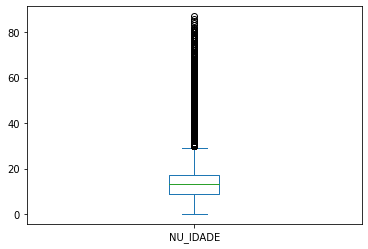

In [419]:
Dataset['NU_IDADE'].plot.box()

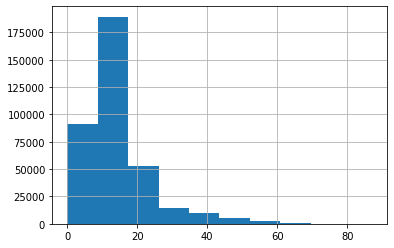

In [420]:
Dataset['NU_IDADE'].hist()

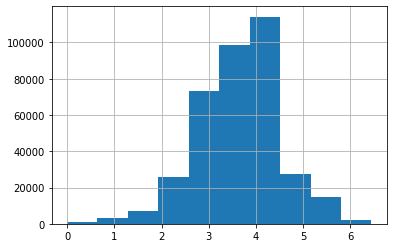

In [421]:
from numpy import log2
Dataset['NU_IDADE_log'] =log2(Dataset[Dataset.NU_IDADE > 0].NU_IDADE)


#Dataset['NU_IDADE_log'] = log2(Dataset['NU_IDADE_adapted'])
Dataset['NU_IDADE_log'].hist()

Na tentativa de encontrar uma distribuição simétrica, não encontramos um valor ideal, porém continua mais simétrico que originalmente.

Revisar mad -> Dataset_std = Dataset['Nu_idade_log'].std()

In [422]:
from numpy import abs
mad = abs(Dataset['NU_IDADE_log'] - Dataset['NU_IDADE_log'].median()).median()*(1/0.6745)
print(mad)

0.6960493451463602


In [423]:
Dataset['NU_IDADE_log'].mad()

0.6803185388148889

In [424]:
Dataset_outliers = Dataset[abs(Dataset['NU_IDADE_log']-Dataset['NU_IDADE_log'].median())/mad > 3.5]
Dataset_outliers.NU_IDADE.unique()

array([ 2,  1, 75, 78, 74, 73, 71, 72, 76, 86, 85, 84, 80, 79, 81, 77, 87,
       82, 83])

É evidente que essas idades não são necessariamente outliers, por isso, seguimos com uma análise somente de aprendizado sobre o dataset.

In [425]:
#Dataset = Dataset[abs(Dataset['NU_IDADE_log']-Dataset['NU_IDADE_log'].median())/mad < 3.5]
print(len(Dataset_outliers))

4417


###Removendo outliers utilizando método de tukey(univariado)

In [426]:
Dataset['NU_IDADE'].describe()

count    367324.000000
mean         14.673683
std           9.384915
min           0.000000
25%           9.000000
50%          13.000000
75%          17.000000
max          87.000000
Name: NU_IDADE, dtype: float64

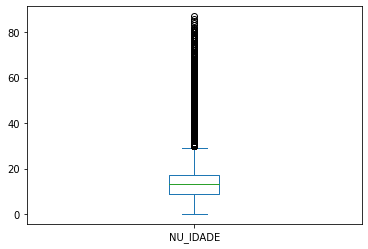

In [427]:
Dataset['NU_IDADE'].plot.box()

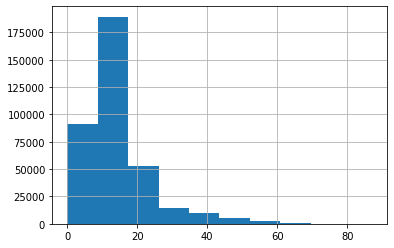

In [428]:
Dataset['NU_IDADE'].hist()

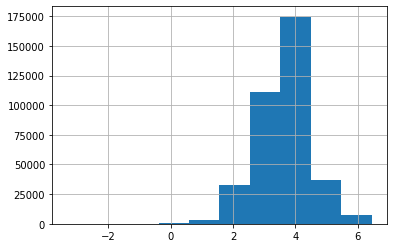

In [429]:
Dataset['NU_IDADE_log_tukey'] = log2(Dataset['NU_IDADE'] + 0.1)
Dataset['NU_IDADE_log_tukey'].hist()

In [430]:
q1 = Dataset['NU_IDADE_log_tukey'].quantile(q=0.25)
q3 = Dataset['NU_IDADE_log_tukey'].quantile(q=0.75)
iqr = q3 - q1
print(iqr)

0.9100578746872019


In [431]:
Dataset[Dataset['NU_IDADE_log_tukey'] < (q1-1.5*iqr)]['NU_IDADE'].unique()

array([3, 2, 1, 0])

In [432]:
Dataset[Dataset['NU_IDADE_log_tukey'] > (q3+1.5*iqr)]

,NU_ANO_CENSO,ID_ALUNO,ID_MATRICULA,NU_MES,NU_ANO,NU_IDADE_REFERENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,CO_PAIS_ORIGEM,CO_UF_NASC,CO_MUNICIPIO_NASC,CO_UF_END,CO_MUNICIPIO_END,TP_ZONA_RESIDENCIAL,IN_NECESSIDADE_ESPECIAL,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_DEF_AUDITIVA,IN_DEF_FISICA,IN_DEF_INTELECTUAL,IN_SURDEZ,IN_SURDOCEGUEIRA,IN_DEF_MULTIPLA,IN_AUTISMO,IN_SUPERDOTACAO,IN_RECURSO_LEDOR,IN_RECURSO_TRANSCRICAO,IN_RECURSO_INTERPRETE,IN_RECURSO_LIBRAS,IN_RECURSO_LABIAL,IN_RECURSO_AMPLIADA_18,IN_RECURSO_AMPLIADA_24,IN_RECURSO_CD_AUDIO,IN_RECURSO_PROVA_PORTUGUES,IN_RECURSO_VIDEO_LIBRAS,IN_RECURSO_BRAILLE,IN_RECURSO_NENHUM,IN_AEE_LIBRAS,IN_AEE_LINGUA_PORTUGUESA,IN_AEE_INFORMATICA_ACESSIVEL,IN_AEE_BRAILLE,IN_AEE_CAA,IN_AEE_SOROBAN,IN_AEE_VIDA_AUTONOMA,IN_AEE_OPTICOS_NAO_OPTICOS,IN_AEE_ENRIQ_CURRICULAR,IN_AEE_DESEN_COGNITIVO,IN_AEE_MOBILIDADE,TP_OUTRO_LOCAL_AULA,IN_TRANSPORTE_PUBLICO,TP_RESPONSAVEL_TRANSPORTE,IN_TRANSP_BICICLETA,IN_TRANSP_MICRO_ONIBUS,IN_TRANSP_ONIBUS,IN_TRANSP_TR_ANIMAL,IN_TRANSP_VANS_KOMBI,IN_TRANSP_OUTRO_VEICULO,IN_TRANSP_EMBAR_ATE5,IN_TRANSP_EMBAR_5A15,IN_TRANSP_EMBAR_15A35,IN_TRANSP_EMBAR_35,TP_ETAPA_ENSINO,IN_ESPECIAL_EXCLUSIVA,IN_REGULAR,IN_EJA,IN_PROFISSIONALIZANTE,ID_TURMA,TP_MEDIACAO_DIDATICO_PEDAGO,NU_DURACAO_TURMA,NU_DUR_ATIV_COMP_MESMA_REDE,NU_DUR_ATIV_COMP_OUTRAS_REDES,NU_DUR_AEE_MESMA_REDE,NU_DUR_AEE_OUTRAS_REDES,NU_DIAS_ATIVIDADE,TP_UNIFICADA,TP_TIPO_ATENDIMENTO_TURMA,TP_TIPO_LOCAL_TURMA,CO_ENTIDADE,CO_REGIAO,CO_MESORREGIAO,CO_MICRORREGIAO,CO_UF,CO_MUNICIPIO,CO_DISTRITO,TP_DEPENDENCIA,TP_LOCALIZACAO,TP_CATEGORIA_ESCOLA_PRIVADA,IN_CONVENIADA_PP,IN_MANT_ESCOLA_PRIVADA_EMP,IN_MANT_ESCOLA_PRIVADA_ONG,IN_MANT_ESCOLA_PRIVADA_OSCIP,IN_MANT_ESCOLA_PRIV_ONG_OSCIP,IN_MANT_ESCOLA_PRIVADA_SIND,IN_MANT_ESCOLA_PRIVADA_SIST_S,IN_MANT_ESCOLA_PRIVADA_S_FINS,TP_REGULAMENTACAO,TP_LOCALIZACAO_DIFERENCIADA,IN_EDUCACAO_INDIGENA,NU_IDADE_norm,NU_IDADE_dist,NU_IDADE_dist_quant,NU_IDADE_log,NU_IDADE_log_tukey
12,2020,6FE892DE8445E5849E9F94C6DCA01072,349771551,7,1964,55,56,2,0,1,76,26,2604106,26,2600054,1,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,3,0,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,40,0,0,0,1,15487547,1,195,0,0,0,0,3,0,1,0,26182858,2,2605,26017,26,2611606,261160605,4,1,1,0,1,0,0,0,0,0,0,1,0,0,0.643678,"(52.2, 60.9]","(17.0, 87.0]",5.807355,5.809929
182,2020,23FECA729017B84A35160B0BB76EBA16,397288954,12,1970,49,50,2,0,1,76,26,2611606,26,2611606,1,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,3,0,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,40,0,0,0,1,19004479,1,180,0,0,0,0,5,5,1,0,26164736,2,2605,26017,26,2611606,261160605,4,1,1,0,1,0,0,0,0,0,0,1,0,0,0.574713,"(43.5, 52.2]","(17.0, 87.0]",5.643856,5.646739
446,2020,33DD3B158670C344D7A1F1540AAD53A8,409149817,3,1968,52,52,2,0,1,76,26,2611606,26,2611606,1,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,3,-1,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,40,0,0,0,1,19213361,3,-1,0,0,0,0,-1,0,1,-1,26188040,2,2605,26017,26,2611606,261160605,2,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,0,0,0.597701,"(43.5, 52.2]","(17.0, 87.0]",5.700440,5.703211
522,2020,1B9DAB3C09FD320691E2B935AFBDC7A6,381685195,10,1969,50,51,2,3,1,76,26,2610509,26,2611606,1,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,3,0,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,40,0,0,0,1,17404798,1,240,0,0,0,0,5,0,1,0,26132176,2,2605,26017,26,2611606,261160605,4,1,1,0,1,0,0,0,0,0,0,1,0,0,0.586207,"(43.5, 52.2]","(17.0, 87.0]",5.672425,5.675251
732,2020,84B5B4B570ECF029A4719AFD0B77181C,349775138,2,1975,45,45,

In [433]:
Dataset[Dataset['NU_IDADE_log_tukey'] < (q1-1.5*iqr)]

,NU_ANO_CENSO,ID_ALUNO,ID_MATRICULA,NU_MES,NU_ANO,NU_IDADE_REFERENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,CO_PAIS_ORIGEM,CO_UF_NASC,CO_MUNICIPIO_NASC,CO_UF_END,CO_MUNICIPIO_END,TP_ZONA_RESIDENCIAL,IN_NECESSIDADE_ESPECIAL,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_DEF_AUDITIVA,IN_DEF_FISICA,IN_DEF_INTELECTUAL,IN_SURDEZ,IN_SURDOCEGUEIRA,IN_DEF_MULTIPLA,IN_AUTISMO,IN_SUPERDOTACAO,IN_RECURSO_LEDOR,IN_RECURSO_TRANSCRICAO,IN_RECURSO_INTERPRETE,IN_RECURSO_LIBRAS,IN_RECURSO_LABIAL,IN_RECURSO_AMPLIADA_18,IN_RECURSO_AMPLIADA_24,IN_RECURSO_CD_AUDIO,IN_RECURSO_PROVA_PORTUGUES,IN_RECURSO_VIDEO_LIBRAS,IN_RECURSO_BRAILLE,IN_RECURSO_NENHUM,IN_AEE_LIBRAS,IN_AEE_LINGUA_PORTUGUESA,IN_AEE_INFORMATICA_ACESSIVEL,IN_AEE_BRAILLE,IN_AEE_CAA,IN_AEE_SOROBAN,IN_AEE_VIDA_AUTONOMA,IN_AEE_OPTICOS_NAO_OPTICOS,IN_AEE_ENRIQ_CURRICULAR,IN_AEE_DESEN_COGNITIVO,IN_AEE_MOBILIDADE,TP_OUTRO_LOCAL_AULA,IN_TRANSPORTE_PUBLICO,TP_RESPONSAVEL_TRANSPORTE,IN_TRANSP_BICICLETA,IN_TRANSP_MICRO_ONIBUS,IN_TRANSP_ONIBUS,IN_TRANSP_TR_ANIMAL,IN_TRANSP_VANS_KOMBI,IN_TRANSP_OUTRO_VEICULO,IN_TRANSP_EMBAR_ATE5,IN_TRANSP_EMBAR_5A15,IN_TRANSP_EMBAR_15A35,IN_TRANSP_EMBAR_35,TP_ETAPA_ENSINO,IN_ESPECIAL_EXCLUSIVA,IN_REGULAR,IN_EJA,IN_PROFISSIONALIZANTE,ID_TURMA,TP_MEDIACAO_DIDATICO_PEDAGO,NU_DURACAO_TURMA,NU_DUR_ATIV_COMP_MESMA_REDE,NU_DUR_ATIV_COMP_OUTRAS_REDES,NU_DUR_AEE_MESMA_REDE,NU_DUR_AEE_OUTRAS_REDES,NU_DIAS_ATIVIDADE,TP_UNIFICADA,TP_TIPO_ATENDIMENTO_TURMA,TP_TIPO_LOCAL_TURMA,CO_ENTIDADE,CO_REGIAO,CO_MESORREGIAO,CO_MICRORREGIAO,CO_UF,CO_MUNICIPIO,CO_DISTRITO,TP_DEPENDENCIA,TP_LOCALIZACAO,TP_CATEGORIA_ESCOLA_PRIVADA,IN_CONVENIADA_PP,IN_MANT_ESCOLA_PRIVADA_EMP,IN_MANT_ESCOLA_PRIVADA_ONG,IN_MANT_ESCOLA_PRIVADA_OSCIP,IN_MANT_ESCOLA_PRIV_ONG_OSCIP,IN_MANT_ESCOLA_PRIVADA_SIND,IN_MANT_ESCOLA_PRIVADA_SIST_S,IN_MANT_ESCOLA_PRIVADA_S_FINS,TP_REGULAMENTACAO,TP_LOCALIZACAO_DIFERENCIADA,IN_EDUCACAO_INDIGENA,NU_IDADE_norm,NU_IDADE_dist,NU_IDADE_dist_quant,NU_IDADE_log,NU_IDADE_log_tukey
3,2020,D295E28AA9D03AC4586E93B822E86C93,422248877,6,2017,2,3,1,3,1,76,26,2607901,26,2611606,1,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,3,0,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,1,0,1,0,0,19791994,1,240,0,0,0,0,5,0,1,0,26187400,2,2605,26017,26,2611606,261160605,4,1,1,0,1,0,0,0,0,0,0,1,0,0,0.034483,"(-0.087, 8.7]","(-0.001, 9.0]",1.584963,1.632268
21,2020,492109F8D5A3DB17BA888CA446B539A9,388533212,12,2018,1,2,1,1,1,76,26,2611606,26,2611606,1,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,3,0,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,1,0,1,0,0,18904013,1,265,0,0,0,0,5,0,1,0,26119935,2,2605,26017,26,2611606,261160605,4,1,1,0,1,0,0,0,0,0,0,1,0,0,0.022989,"(-0.087, 8.7]","(-0.001, 9.0]",1.000000,1.070389
22,2020,2F74484AE747C3992CD66EE0C6DFCADD,405450578,8,2017,2,3,1,1,1,76,26,2611606,26,2611606,1,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,3,0,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,1,0,1,0,0,12797947,1,240,0,0,0,0,5,0,1,0,26188287,2,2605,26017,26,2611606,261160605,4,1,1,0,1,0,0,0,0,0,0,1,0,0,0.034483,"(-0.087, 8.7]","(-0.001, 9.0]",1.584963,1.632268
38,2020,2A990D02F27875876979FD93D01F0CE4,397288593,3,2018,2,2,1,1,1,76,26,2611606,26,2611606,1,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,3,0,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,1,0,1,0,0,121435,1,240,0,0,0,0,5,0,1,0,26122081,2,2605,26017,26,2611606,261160605,4,1,4,0,0,0,0,0,0,0,1,1,0,0,0.022989,"(-0.087, 8.7]","(-0.001, 9.0]",1.000000,1.070389
46,2020,2CAF4C9871780F7C3347D7F7C8C4EEFB,347038942,4,2017,3,3,2,1,1,76,26,2611606,26,26

In [434]:
Dataset_outliers_tukey_over = Dataset[Dataset['NU_IDADE_log_tukey'] > (q3+1.5*iqr)]
Dataset_outliers_tukey_under = Dataset [ Dataset['NU_IDADE_log_tukey'] < (q1-1.5*iqr)]
len(Dataset_outliers_tukey_over)
len(Dataset_outliers_tukey_under)


11564

In [435]:
print(Dataset_outliers_tukey_over.NU_IDADE.unique())

print(Dataset_outliers_tukey_under.NU_IDADE.unique())


[56 50 52 51 45 47 46 61 44 48 53 49 54 58 66 55 57 65 64 62 59 60 63 67
 75 78 68 74 73 71 69 72 70 76 86 85 84 80 79 81 77 87 82 83]
[3 2 1 0]


In [436]:
len(Dataset)

367324

##3. Apresentar estatísticas descritivas dos dados com visualizações

### Análise de covariâncias e valores estatísticos

In [437]:
Dataset.cov()

,NU_ANO_CENSO,ID_MATRICULA,NU_MES,NU_ANO,NU_IDADE_REFERENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,CO_PAIS_ORIGEM,CO_UF_NASC,CO_MUNICIPIO_NASC,CO_UF_END,CO_MUNICIPIO_END,TP_ZONA_RESIDENCIAL,IN_NECESSIDADE_ESPECIAL,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_DEF_AUDITIVA,IN_DEF_FISICA,IN_DEF_INTELECTUAL,IN_SURDEZ,IN_SURDOCEGUEIRA,IN_DEF_MULTIPLA,IN_AUTISMO,IN_SUPERDOTACAO,IN_RECURSO_LEDOR,IN_RECURSO_TRANSCRICAO,IN_RECURSO_INTERPRETE,IN_RECURSO_LIBRAS,IN_RECURSO_LABIAL,IN_RECURSO_AMPLIADA_18,IN_RECURSO_AMPLIADA_24,IN_RECURSO_CD_AUDIO,IN_RECURSO_PROVA_PORTUGUES,IN_RECURSO_VIDEO_LIBRAS,IN_RECURSO_BRAILLE,IN_RECURSO_NENHUM,IN_AEE_LIBRAS,IN_AEE_LINGUA_PORTUGUESA,IN_AEE_INFORMATICA_ACESSIVEL,IN_AEE_BRAILLE,IN_AEE_CAA,IN_AEE_SOROBAN,IN_AEE_VIDA_AUTONOMA,IN_AEE_OPTICOS_NAO_OPTICOS,IN_AEE_ENRIQ_CURRICULAR,IN_AEE_DESEN_COGNITIVO,IN_AEE_MOBILIDADE,TP_OUTRO_LOCAL_AULA,IN_TRANSPORTE_PUBLICO,TP_ETAPA_ENSINO,IN_ESPECIAL_EXCLUSIVA,IN_REGULAR,IN_EJA,IN_PROFISSIONALIZANTE,ID_TURMA,TP_MEDIACAO_DIDATICO_PEDAGO,NU_DURACAO_TURMA,NU_DUR_ATIV_COMP_MESMA_REDE,NU_DUR_ATIV_COMP_OUTRAS_REDES,NU_DUR_AEE_MESMA_REDE,NU_DUR_AEE_OUTRAS_REDES,NU_DIAS_ATIVIDADE,TP_UNIFICADA,TP_TIPO_ATENDIMENTO_TURMA,TP_TIPO_LOCAL_TURMA,CO_ENTIDADE,CO_REGIAO,CO_MESORREGIAO,CO_MICRORREGIAO,CO_UF,CO_MUNICIPIO,CO_DISTRITO,TP_DEPENDENCIA,TP_LOCALIZACAO,TP_CATEGORIA_ESCOLA_PRIVADA,IN_CONVENIADA_PP,IN_MANT_ESCOLA_PRIVADA_EMP,IN_MANT_ESCOLA_PRIVADA_ONG,IN_MANT_ESCOLA_PRIVADA_OSCIP,IN_MANT_ESCOLA_PRIV_ONG_OSCIP,IN_MANT_ESCOLA_PRIVADA_SIND,IN_MANT_ESCOLA_PRIVADA_SIST_S,IN_MANT_ESCOLA_PRIVADA_S_FINS,TP_REGULAMENTACAO,TP_LOCALIZACAO_DIFERENCIADA,IN_EDUCACAO_INDIGENA,NU_IDADE_norm,NU_IDADE_log,NU_IDADE_log_tukey
NU_ANO_CENSO,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.000000,0.000000e+00,0.000000e+00
ID_MATRICULA,0.0,5.056623e+15,-1.403686e+06,-5.944461e+07,5.961972e+07,5.944461e+07,134498.430560,2.042812e+07,-5.449625e+04,-8.819389e+06,72408.931791,-4.492992e+09,-418756.192609,-4.581391e+10,138231.842831,394510.456106,406915.378867,397441.037831,402258.228480,432308.834177,690485.925237,410441.023095,394743.742944,422377.245568,460117.091863,396254.192631,438272.106107,401250.559604,403733.792578,415720.291799,403237.170080,402873.624516,405454.995847,403873.369603,403632.172217,403704.733987,403628.190014,745997.305690,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-6.131453e+03,-2.040308e+06,8.534615e+07,5.773309e+03,-3.675247e+06,1.378790e+06,2.761569e+06,2.358774e+14,4.149639e+06,-1.511948e+08,8.637170e+06,-1.481574e+06,3.703988e+07,1.717852e+06,-1.216740e+07,2.470660e+06,6.092282e+03,-1.916637e+06,-2.869419e+11,0.0,0.0,0.0,0.0,0.0,0.0,-2.443858e+07,0.0,-3.886658e+07,-1.668856e+07,-3.003883e+07,-1.669596e+07,-1.669262e+07,-1.669262e+07,-1.671405e+07,-1.676938e+07,-1.990657e+07,1.553368e+06,0.0,0.0,683271.383301,3.190258e+06,3.191889e+06
NU_MES,0.0,-1.403686e+06,1.151902e+01,-1.169376e+00,-2.630156e-01,1.169376e+00,-0.000286,-1.810726e-02,5.781862e-04,1.455148e-01,-0.012317,-1.194900e+03,0.003170,3.410813e+02,-0.000441,0.000340,0.000416,0.000329,0.000384,0.000918,-0.000238,0.000370,0.000341,0.000774,0.001241,0.000396,0.001358,0.001781,0.001671,0.001733,0.001666,0.001715,0.001601,0.001687,0.001687,0.001674,0

In [438]:
Dataset.corr()

,NU_ANO_CENSO,ID_MATRICULA,NU_MES,NU_ANO,NU_IDADE_REFERENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,CO_PAIS_ORIGEM,CO_UF_NASC,CO_MUNICIPIO_NASC,CO_UF_END,CO_MUNICIPIO_END,TP_ZONA_RESIDENCIAL,IN_NECESSIDADE_ESPECIAL,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_DEF_AUDITIVA,IN_DEF_FISICA,IN_DEF_INTELECTUAL,IN_SURDEZ,IN_SURDOCEGUEIRA,IN_DEF_MULTIPLA,IN_AUTISMO,IN_SUPERDOTACAO,IN_RECURSO_LEDOR,IN_RECURSO_TRANSCRICAO,IN_RECURSO_INTERPRETE,IN_RECURSO_LIBRAS,IN_RECURSO_LABIAL,IN_RECURSO_AMPLIADA_18,IN_RECURSO_AMPLIADA_24,IN_RECURSO_CD_AUDIO,IN_RECURSO_PROVA_PORTUGUES,IN_RECURSO_VIDEO_LIBRAS,IN_RECURSO_BRAILLE,IN_RECURSO_NENHUM,IN_AEE_LIBRAS,IN_AEE_LINGUA_PORTUGUESA,IN_AEE_INFORMATICA_ACESSIVEL,IN_AEE_BRAILLE,IN_AEE_CAA,IN_AEE_SOROBAN,IN_AEE_VIDA_AUTONOMA,IN_AEE_OPTICOS_NAO_OPTICOS,IN_AEE_ENRIQ_CURRICULAR,IN_AEE_DESEN_COGNITIVO,IN_AEE_MOBILIDADE,TP_OUTRO_LOCAL_AULA,IN_TRANSPORTE_PUBLICO,TP_ETAPA_ENSINO,IN_ESPECIAL_EXCLUSIVA,IN_REGULAR,IN_EJA,IN_PROFISSIONALIZANTE,ID_TURMA,TP_MEDIACAO_DIDATICO_PEDAGO,NU_DURACAO_TURMA,NU_DUR_ATIV_COMP_MESMA_REDE,NU_DUR_ATIV_COMP_OUTRAS_REDES,NU_DUR_AEE_MESMA_REDE,NU_DUR_AEE_OUTRAS_REDES,NU_DIAS_ATIVIDADE,TP_UNIFICADA,TP_TIPO_ATENDIMENTO_TURMA,TP_TIPO_LOCAL_TURMA,CO_ENTIDADE,CO_REGIAO,CO_MESORREGIAO,CO_MICRORREGIAO,CO_UF,CO_MUNICIPIO,CO_DISTRITO,TP_DEPENDENCIA,TP_LOCALIZACAO,TP_CATEGORIA_ESCOLA_PRIVADA,IN_CONVENIADA_PP,IN_MANT_ESCOLA_PRIVADA_EMP,IN_MANT_ESCOLA_PRIVADA_ONG,IN_MANT_ESCOLA_PRIVADA_OSCIP,IN_MANT_ESCOLA_PRIV_ONG_OSCIP,IN_MANT_ESCOLA_PRIVADA_SIND,IN_MANT_ESCOLA_PRIVADA_SIST_S,IN_MANT_ESCOLA_PRIVADA_S_FINS,TP_REGULAMENTACAO,TP_LOCALIZACAO_DIFERENCIADA,IN_EDUCACAO_INDIGENA,NU_IDADE_norm,NU_IDADE_log,NU_IDADE_log_tukey
NU_ANO_CENSO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ID_MATRICULA,NaN,1.000000,-0.005816,-0.089074,0.089359,0.089074,0.003783,0.214117,-0.012418,-0.008148,0.000517,-0.000322,-0.006687,-0.007314,0.018680,0.037569,0.036600,0.037510,0.036879,0.036438,0.039383,0.037187,0.037577,0.037542,0.032014,0.036972,0.020215,0.019074,0.019741,0.020081,0.019701,0.019670,0.019781,0.019741,0.019736,0.019740,0.019723,0.028962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.003659,-0.090800,0.075169,0.003480,-0.127586,0.086663,0.104083,0.571726,0.092810,-0.015390,0.017554,-0.016825,0.035112,0.007731,-0.089785,0.064091,0.002789,-0.077283,-0.063997,NaN,NaN,NaN,NaN,NaN,NaN,-0.386559,NaN,-0.493184,-0.481768,-0.464860,-0.491120,-0.490888,-0.490888,-0.474140,-0.468004,-0.491776,0.091759,NaN,NaN,0.089074,0.050481,0.051062
NU_MES,NaN,-0.005816,1.000000,-0.036713,-0.008259,0.036713,-0.000169,-0.003976,0.002760,0.002817,-0.001843,-0.001794,0.001060,0.001141,-0.001248,0.000679,0.000784,0.000651,0.000737,0.001622,-0.000285,0.000702,0.000679,0.001442,0.001809,0.000774,0.001312,0.001774,0.001712,0.001754,0.001705,0.001754,0.001636,0.001728,0.001729,0.001715,0.001637,0.001931,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.000513,-0.002304,0.000066,-0.002752,-0.006526,0.004761,0.003224,-0.004355,0.002536,-0.007162,-0.000294,-0.001377,-0.000335,0.000105,-0.002799,0.010267,-0.002618,-0.002686,0.002628,NaN,NaN,NaN,NaN,NaN,NaN,0.006962,NaN,0.006575,0.006694,0.006811,0.006768,0.006763,0.006763,0.006750,0.006563,0.006527,0.002558,NaN,NaN,0.036713,0.050466,0.050541
NU_ANO,NaN,-0.089074,-0.036713,1.000000,-0.998611,-1.000000,-0.068219,0.086575,0.005468,0.002304,-0.015844,-0.013986,0.001809,0.004545,-0.061535,0.004048,0.003936,0.003918,0.003152,0.004292,-0.005638,0.000843,0.004035,0.003162,0.017783,0.004540,0.003887,0.003715,0.002423,0.001167,0.002398,0.002451,0.002323,0.002394,0.002409,0.002428,0.002419,0.002966,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003742,0.464901,-0.758976,-0.033317,0.719612,-0.386281,-0.55

In [439]:
import matplotlib.pyplot as plt

import seaborn as sns

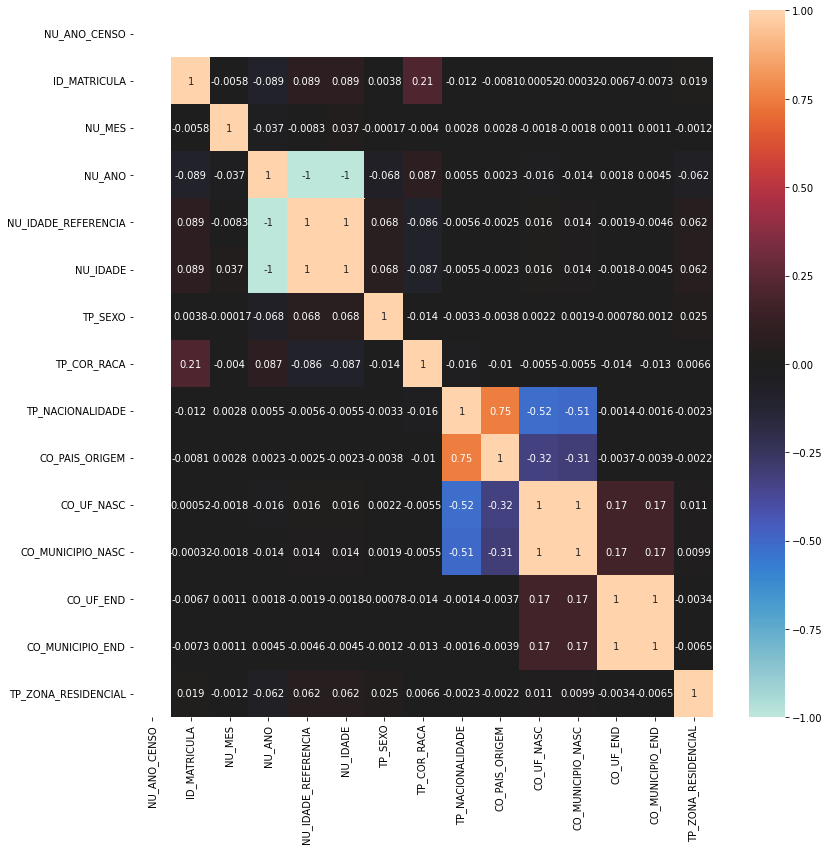

In [440]:
correlation_pearson = Dataset_Info_Alunos.corr(method='pearson')

fig, ax = plt.subplots(figsize=(13,13))
sns.heatmap(correlation_pearson, cmap="icefire", annot=True)

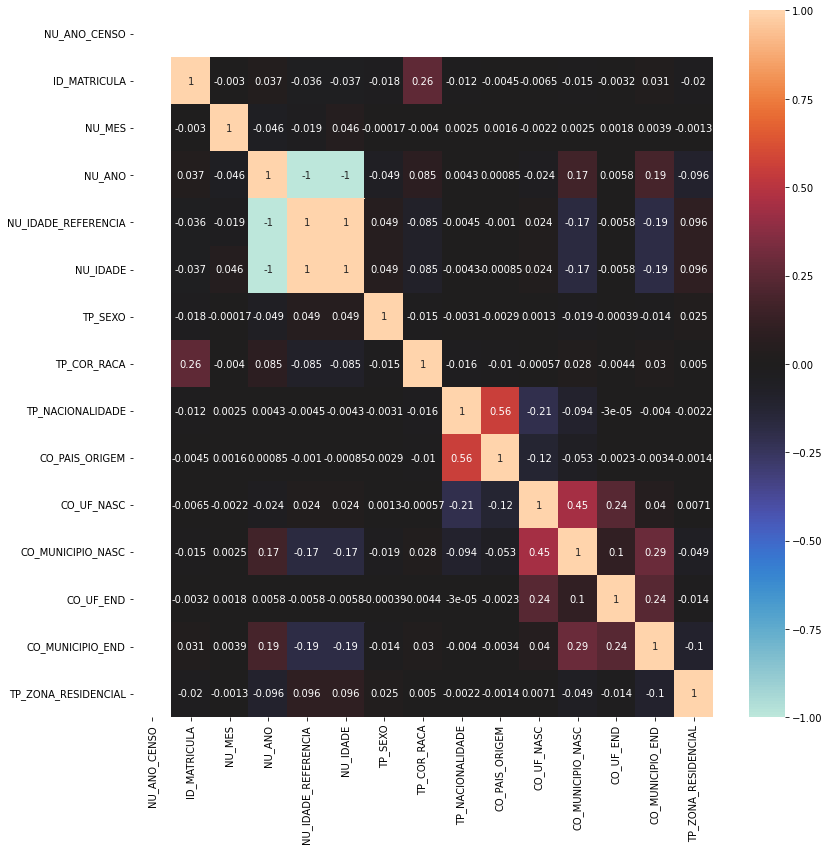

In [441]:
correlation_spearman = Dataset_Info_Alunos.corr(method='spearman')

fig, ax = plt.subplots(figsize=(13,13))
sns.heatmap(correlation_spearman, cmap="icefire", annot=True)

###Analizando Alunos escolas privadas x públicas

In [442]:
Dataset2 = Dataset['TP_CATEGORIA_ESCOLA_PRIVADA']

Dataset3 = Dataset['IN_CONVENIADA_PP']

Dataset5 = Dataset['IN_MANT_ESCOLA_PRIVADA_EMP']

Dataset6 = Dataset['IN_MANT_ESCOLA_PRIVADA_ONG']

print(Dataset2.isnull().sum())
print(Dataset3.isnull().sum())
print(Dataset5.isnull().sum())
print(Dataset6.isnull().sum())

0
0
0
0


In [443]:
print(Dataset['TP_CATEGORIA_ESCOLA_PRIVADA'].unique())

print(len(Dataset['TP_CATEGORIA_ESCOLA_PRIVADA'].unique()))

[ 1  4 -1  2  3]
5


In [444]:
selected_rows_publica = Dataset[Dataset['TP_CATEGORIA_ESCOLA_PRIVADA'] == -1]

selected_rows_privada = Dataset[Dataset['TP_CATEGORIA_ESCOLA_PRIVADA'] != -1]

print(selected_rows_privada.shape)
print(selected_rows_publica.shape)


(128872, 105)
(238452, 105)


In [445]:
print(194405 + 90920)

285325


In [446]:
def privorpub(row):
  cmp = row['TP_CATEGORIA_ESCOLA_PRIVADA'] 
  if cmp == -1:
    return 0
  else:
    return 1

In [447]:
Dataset['Privada'] = Dataset.apply(lambda row: privorpub(row), axis=1)

In [448]:
Dataset.head()

,NU_ANO_CENSO,ID_ALUNO,ID_MATRICULA,NU_MES,NU_ANO,NU_IDADE_REFERENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,CO_PAIS_ORIGEM,CO_UF_NASC,CO_MUNICIPIO_NASC,CO_UF_END,CO_MUNICIPIO_END,TP_ZONA_RESIDENCIAL,IN_NECESSIDADE_ESPECIAL,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_DEF_AUDITIVA,IN_DEF_FISICA,IN_DEF_INTELECTUAL,IN_SURDEZ,IN_SURDOCEGUEIRA,IN_DEF_MULTIPLA,IN_AUTISMO,IN_SUPERDOTACAO,IN_RECURSO_LEDOR,IN_RECURSO_TRANSCRICAO,IN_RECURSO_INTERPRETE,IN_RECURSO_LIBRAS,IN_RECURSO_LABIAL,IN_RECURSO_AMPLIADA_18,IN_RECURSO_AMPLIADA_24,IN_RECURSO_CD_AUDIO,IN_RECURSO_PROVA_PORTUGUES,IN_RECURSO_VIDEO_LIBRAS,IN_RECURSO_BRAILLE,IN_RECURSO_NENHUM,IN_AEE_LIBRAS,IN_AEE_LINGUA_PORTUGUESA,IN_AEE_INFORMATICA_ACESSIVEL,IN_AEE_BRAILLE,IN_AEE_CAA,IN_AEE_SOROBAN,IN_AEE_VIDA_AUTONOMA,IN_AEE_OPTICOS_NAO_OPTICOS,IN_AEE_ENRIQ_CURRICULAR,IN_AEE_DESEN_COGNITIVO,IN_AEE_MOBILIDADE,TP_OUTRO_LOCAL_AULA,IN_TRANSPORTE_PUBLICO,TP_RESPONSAVEL_TRANSPORTE,IN_TRANSP_BICICLETA,IN_TRANSP_MICRO_ONIBUS,IN_TRANSP_ONIBUS,IN_TRANSP_TR_ANIMAL,IN_TRANSP_VANS_KOMBI,IN_TRANSP_OUTRO_VEICULO,IN_TRANSP_EMBAR_ATE5,IN_TRANSP_EMBAR_5A15,IN_TRANSP_EMBAR_15A35,IN_TRANSP_EMBAR_35,TP_ETAPA_ENSINO,IN_ESPECIAL_EXCLUSIVA,IN_REGULAR,IN_EJA,IN_PROFISSIONALIZANTE,ID_TURMA,TP_MEDIACAO_DIDATICO_PEDAGO,NU_DURACAO_TURMA,NU_DUR_ATIV_COMP_MESMA_REDE,NU_DUR_ATIV_COMP_OUTRAS_REDES,NU_DUR_AEE_MESMA_REDE,NU_DUR_AEE_OUTRAS_REDES,NU_DIAS_ATIVIDADE,TP_UNIFICADA,TP_TIPO_ATENDIMENTO_TURMA,TP_TIPO_LOCAL_TURMA,CO_ENTIDADE,CO_REGIAO,CO_MESORREGIAO,CO_MICRORREGIAO,CO_UF,CO_MUNICIPIO,CO_DISTRITO,TP_DEPENDENCIA,TP_LOCALIZACAO,TP_CATEGORIA_ESCOLA_PRIVADA,IN_CONVENIADA_PP,IN_MANT_ESCOLA_PRIVADA_EMP,IN_MANT_ESCOLA_PRIVADA_ONG,IN_MANT_ESCOLA_PRIVADA_OSCIP,IN_MANT_ESCOLA_PRIV_ONG_OSCIP,IN_MANT_ESCOLA_PRIVADA_SIND,IN_MANT_ESCOLA_PRIVADA_SIST_S,IN_MANT_ESCOLA_PRIVADA_S_FINS,TP_REGULAMENTACAO,TP_LOCALIZACAO_DIFERENCIADA,IN_EDUCACAO_INDIGENA,NU_IDADE_norm,NU_IDADE_dist,NU_IDADE_dist_quant,NU_IDADE_log,NU_IDADE_log_tukey,Privada
0,2020,790269B39914035DE33BCB827C4F2D83,435039863,12,2009,10,11,2,3,1,76,26,2611606,26,2611606,1,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,3,0,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,18,0,1,0,0,16608193,1,240,0,0,0,0,5,0,1,0,26125447,2,2605,26017,26,2611606,261160605,4,1,1,0,1,0,0,0,0,0,0,1,0,0,0.126437,"(8.7, 17.4]","(9.0, 13.0]",3.459432,3.472488,1
1,2020,311363D9AB845EB53D7D6F12FE657CF9,351780516,6,2008,11,12,2,1,1,76,26,2611606,26,2611606,1,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,3,0,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,19,0,1,0,0,18884068,1,270,0,0,0,0,5,0,1,0,26143186,2,2605,26017,26,2611606,261160605,4,1,1,0,1,0,0,0,0,0,0,1,0,0,0.137931,"(8.7, 17.4]","(9.0, 13.0]",3.584963,3.596935,1
2,2020,0CFD8C53003C50D16BC9DE8E1CAFF658,419928618,4,2008,12,12,2,1,1,76,26,2611606,26,2611606,1,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,3,0,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,16,0,1,0,0,15523710,1,260,0,0,0,0,5,0,1,0,26120968,2,2605,26017,26,2611606,261160605,4,1,4,0,1,0,0,0,0,0,1,1,0,0,0.137931,"(8.7, 17.4]","(9.0, 13.0]",3.584963,3.596935,1
3,2020,D295E28AA9D03AC4586E93B822E86C93,422248877,6,2017,2,3,1,3,1,76,26,2607901,26,2611606,1,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,3,0,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,TRANSPPRIV,1,0,1,0,0,19791994,1,240,0,0,0,0,5,0,1,0,26187400,2,2605,26017,26,2611606,261160605,4,1,1,0,1,0,0,0,0,0,0,1,0,0,0.034483,"(-0.087, 8.7]","(-0.001, 9.0]",1.584963,1.632268,1
4,2020,44066D73C8A75DD9611F8272BE80AC74,404705028,5,2013,7,7,1,1,1,76,26,26

###Análise geral dos atributos com histogramas e gráficos

In [449]:
Dataset['TP_MEDIACAO_DIDATICO_PEDAGO'].describe()
# 1.0 -> presencial
# 2.0 -> Híbrido
# 3.0 -> EAD

count    367324.000000
mean          1.222398
std           0.628757
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           3.000000
Name: TP_MEDIACAO_DIDATICO_PEDAGO, dtype: float64

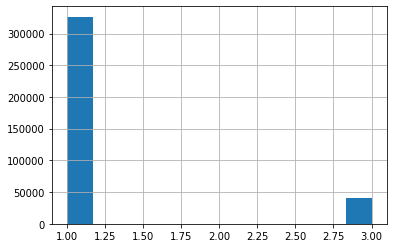

In [450]:
Dataset.TP_MEDIACAO_DIDATICO_PEDAGO.hist(bins = 12)

In [451]:
Dataset['TP_SEXO'].describe()

count    367324.000000
mean          1.505913
std           0.499966
min           1.000000
25%           1.000000
50%           2.000000
75%           2.000000
max           2.000000
Name: TP_SEXO, dtype: float64

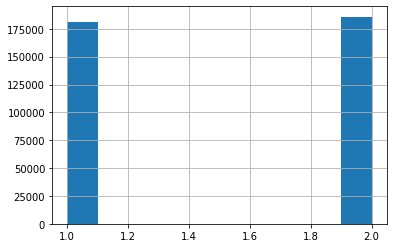

In [452]:
Dataset.TP_SEXO.hist(bins = 10)

In [453]:
Dataset['TP_COR_RACA'].describe()
#0 - Não_declarada
#1 - Branca
#2 - Preta
#3 - Parda
#4 - Amarela
#5 - Indígena

listaetnica = ['Nao_declarada','Branca','Preta','Parda','Amarela','Indígena']

In [454]:
print(Dataset['TP_COR_RACA'].unique())

print(len(Dataset['TP_COR_RACA'].unique()))

print(Dataset['TP_COR_RACA'].value_counts())

[3 1 0 2 4 5]
6
3    151666
0    124583
1     71900
2     16822
4      1717
5       636
Name: TP_COR_RACA, dtype: int64


In [455]:
def convert_to_color(categorical_value):
  if categorical_value == '0':
    return 'Nao_declarada'
  if categorical_value == '1':
    return 'Branca'
  if categorical_value == '2':
    return 'Preta'
  if categorical_value == '3':
    return 'Parda'
  if categorical_value == '4':
    return 'Amarela'
  if categorical_value == '5':
    return 'Indígena'

In [456]:
Dataset_foretn = Dataset_Info_Alunos
Dataset_foretn['TP_COR_RACA'] = Dataset_foretn['TP_COR_RACA'].astype('string')
Dataset_foretn['TP_COR_RACA'] = Dataset_foretn['TP_COR_RACA'].apply(convert_to_color)

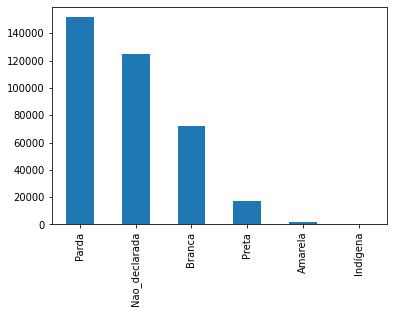

In [457]:
Dataset_foretn['TP_COR_RACA'].value_counts().plot.bar()

In [458]:
Dataset['NU_IDADE'].describe()

count    367324.000000
mean         14.673683
std           9.384915
min           0.000000
25%           9.000000
50%          13.000000
75%          17.000000
max          87.000000
Name: NU_IDADE, dtype: float64

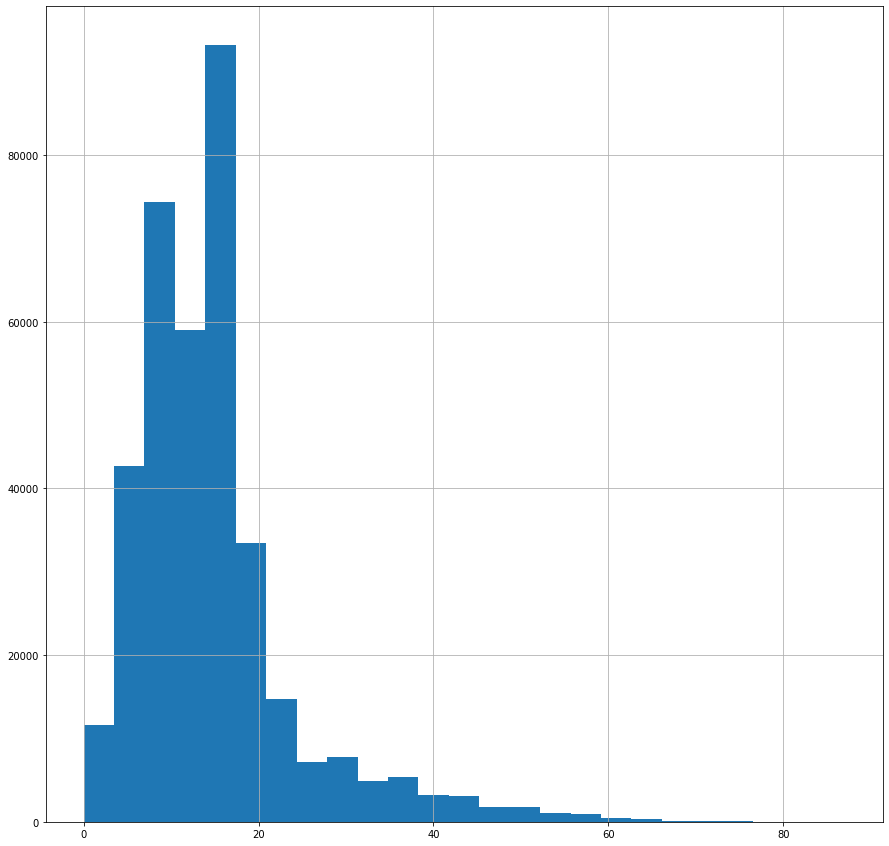

In [459]:
Dataset.NU_IDADE.hist(bins = 25,figsize=(15, 15))

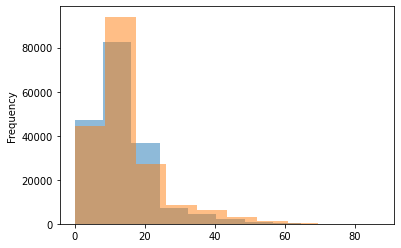

In [460]:
Dataset[Dataset['TP_SEXO'] == 1]['NU_IDADE'].plot(kind='hist',alpha=0.5,label='Homem')

Dataset[Dataset['TP_SEXO'] == 2]['NU_IDADE'].plot(kind='hist',alpha=0.5, label='Mulher')

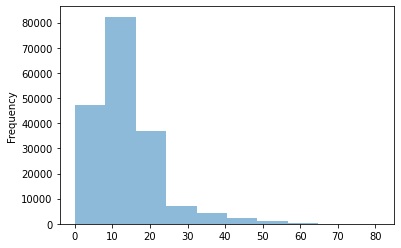

In [461]:
Dataset[Dataset['TP_SEXO'] == 1]['NU_IDADE'].plot(kind='hist',alpha=0.5,label='Homem')

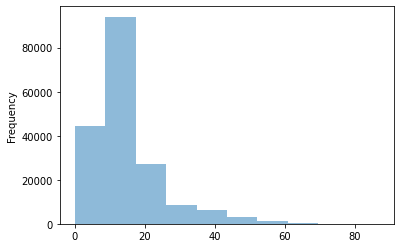

In [462]:
Dataset[Dataset['TP_SEXO'] == 2]['NU_IDADE'].plot(kind='hist',alpha=0.5, label='Mulher')

In [463]:
Dataset['Privada'].describe()

count    367324.000000
mean          0.350840
std           0.477234
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: Privada, dtype: float64

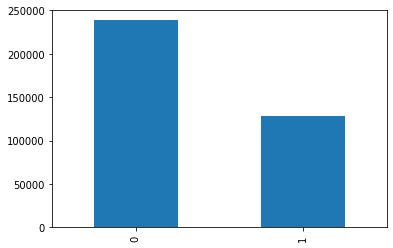

In [464]:
Dataset['Privada'].value_counts().plot.bar()

In [465]:
print(Dataset['CO_PAIS_ORIGEM'].unique())

print(len(Dataset['CO_PAIS_ORIGEM'].unique()))

[ 76 250 528 840 380  68  32 620 554 170 826 364 862 124 156 604 276 392
 208 724 484 218 192 600 508  40  36 152 832 710 616  20 608  56  24 466
 258 356 686 642 999]
41


In [466]:
Dataset_Info_Alunos['CO_PAIS_ORIGEM'] = Dataset_Info_Alunos['CO_PAIS_ORIGEM'].astype('string')

In [467]:
Datasetcorret = Dataset_Info_Alunos

In [468]:
# Alunos nascidos fora do brasil
Datasetcorret = Datasetcorret[Datasetcorret['CO_PAIS_ORIGEM'] != '76']

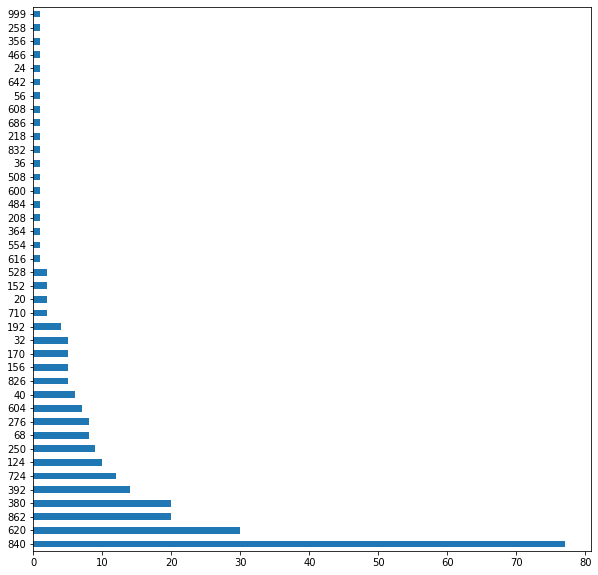

In [469]:
Datasetcorret['CO_PAIS_ORIGEM'].value_counts().plot.barh(figsize=(10, 10))

Sendo:

840 -> Estados Unidos

620 -> Portugal

862 -> Venezuela

380 -> Itália

724 -> Espanha

In [470]:
print(Dataset['CO_UF_NASC'].unique())

print(len(Dataset['CO_UF_NASC'].unique()))

[26 23 35 53 24 15 -1 29 27 21 41 16 33 25 11 43 31 42 22 13 50 51 14 28
 52 32 12 17]
28


In [471]:
Dataset_Info_Alunos['CO_UF_NASC'] = Dataset_Info_Alunos['CO_UF_NASC'].astype('string')

In [472]:
Datasetcorret = Dataset_Info_Alunos

In [473]:
# Alunos nascidos fora do brasil
Datasetcorret = Datasetcorret[Datasetcorret['CO_UF_NASC'] != '26']

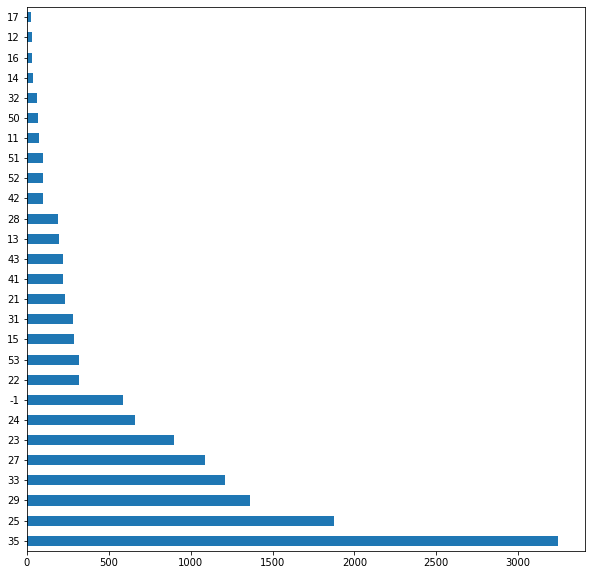

In [474]:
Datasetcorret['CO_UF_NASC'].value_counts().plot.barh(figsize=(10, 10))

Sendo:

35 -> São Paulo

25 -> Paraíba

29 -> Bahia

33 -> Rio de Janeiro

27 -> Alagoas


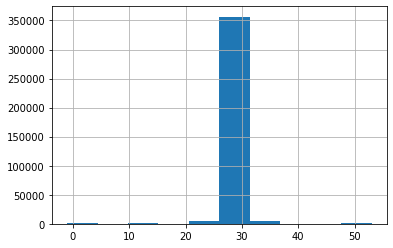

In [475]:
Dataset['CO_UF_NASC'].hist()

In [476]:
print(Dataset['CO_MUNICIPIO_NASC'].unique())

print(len(Dataset['CO_MUNICIPIO_NASC'].unique()))

[2611606 2607901 2604106 ... 3530805 2916203 3148004]
1389


In [477]:
print(Dataset['CO_UF_END'].unique())

print(len(Dataset['CO_UF_END'].unique()))

[26 51 53 29 25 16 24 27 23 22 13 11 42 33 50 14 31 35 52 15 28 32 43 17
 12 41 21]
27


In [478]:
Dataset_Info_Alunos['CO_UF_END'] = Dataset_Info_Alunos['CO_UF_END'].astype('string')

In [479]:
Datasetcorret = Dataset_Info_Alunos

In [480]:
# Alunos morando fora de PE
Datasetcorret = Datasetcorret[Datasetcorret['CO_UF_END'] != '26']

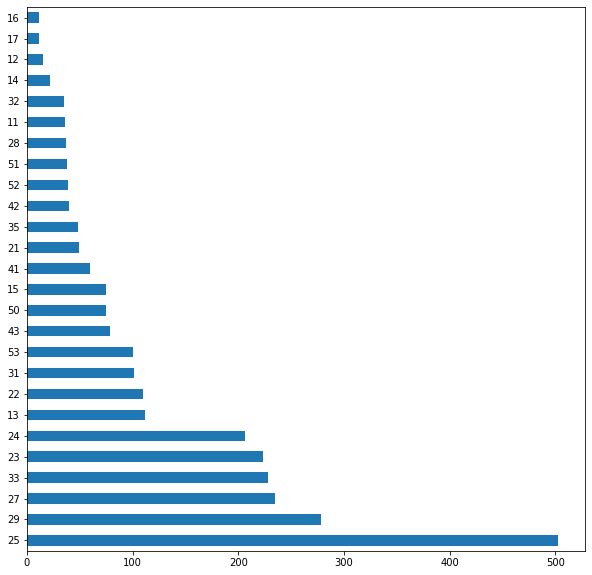

In [481]:
Datasetcorret['CO_UF_END'].value_counts().plot.barh(figsize=(10, 10))

Sendo:

25 -> Paraíba

29 -> Bahia

27 -> Alagoas

33 -> Rio de Janeiro

23 -> Ceará

In [482]:
print(Dataset['CO_MUNICIPIO_END'].unique())

print(len(Dataset['CO_MUNICIPIO_END'].unique()))

[2611606 2606408 2600054 2610608 2607901 2610707 2609600 2612208 2602902
 2610509 2605905 2603454 2614501 2611309 2601607 2613909 2610004 2605400
 2606606 2600906 5107909 5300108 2603009 2615300 2600104 2927408 2507507
 2613008 2604106 2609402 2914802 2614402 1600303 2607752 2602605 2605608
 2408102 2603405 2602803 2605004 2605202 2701001 2601409 2403608 2608503
 2304400 2611903 2613701 2605103 2607208 2305803 2211001 2402006 2605301
 2609501 2601102 2614857 2612703 2607653 2614600 2611804 2610202 2611101
 2611200 2606804 2202307 2606002 2609709 2601052 2503209 2616407 2615508
 2504009 2615706 1302603 2612406 2615102 2601904 1100205 2614105 4204202
 5103403 2600609 3303906 3304557 2602100 2610905 2604403 5005707 2201556
 2613602 1400100 2401404 3137536 3144805 2610806 2607604 3106200 1303809
 2506301 2506251 2608057 3168606 3550308 5210109 2601706 2613305 2612471
 2605152 1503606 2608909 2613107 2403251 2601201 3304904 2602209 5003306
 2601508 2602308 2704302 2608453 1301506 2602001 24

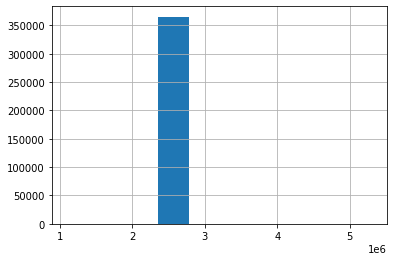

In [483]:
Dataset['CO_MUNICIPIO_END'].hist()

In [484]:
print(Dataset['TP_ZONA_RESIDENCIAL'].unique())

print(len(Dataset['TP_ZONA_RESIDENCIAL'].unique()))

[1 2]
2


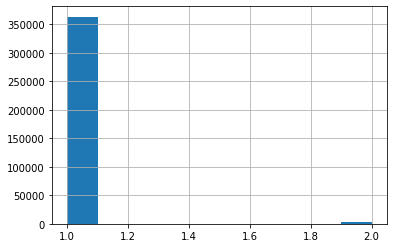

In [485]:
Dataset['TP_ZONA_RESIDENCIAL'].hist()

#1 -> URBANA
#2 -> RURAL

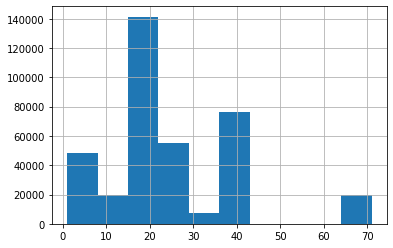

In [486]:
Dataset['TP_ETAPA_ENSINO'].hist()

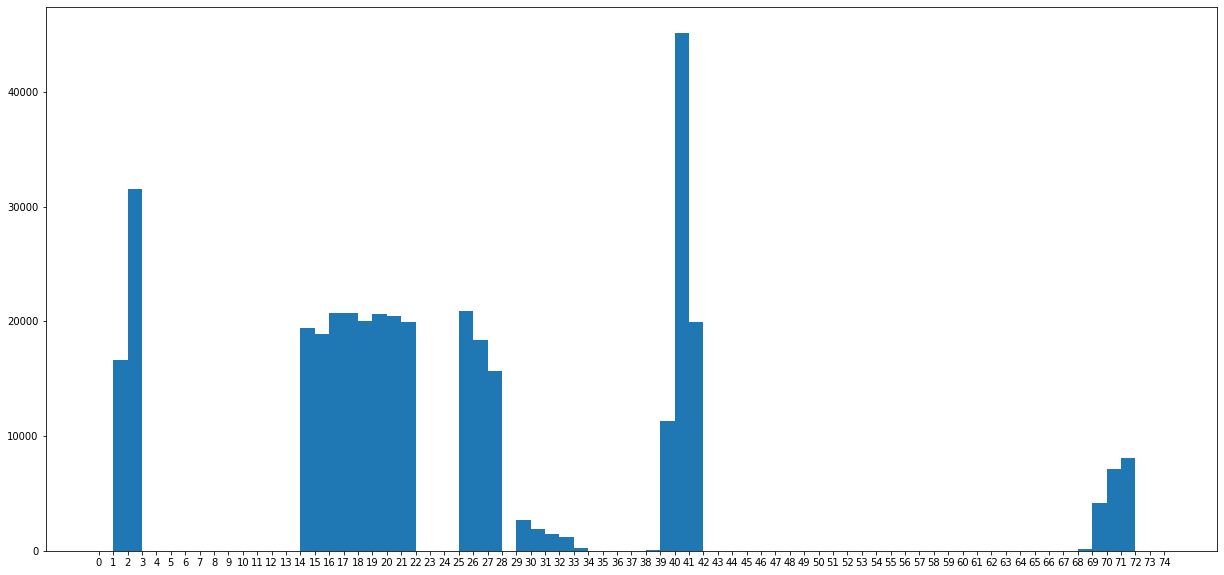

In [487]:
#plt.hist(Dataset['TP_ETAPA_ENSINO'], bins=range(75))
fig = plt.figure(figsize=(21, 10))
plt.xticks(range(75))
plt.hist(Dataset['TP_ETAPA_ENSINO'], bins=range(75))
plt.show()

##4. Realizar testes de hipóteses para comparação de valores de categorias

In [488]:
from matplotlib import pyplot
import scipy.stats as stats 
from scipy.stats import mannwhitneyu, ttest_ind

###Idade/sexo


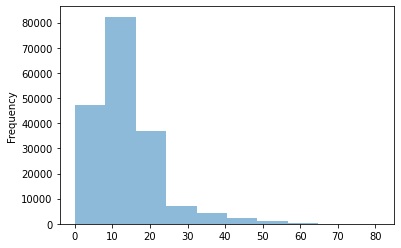

In [489]:
Dataset[Dataset['TP_SEXO'] == 1]['NU_IDADE'].plot(kind='hist',alpha=0.5,label='Homem')

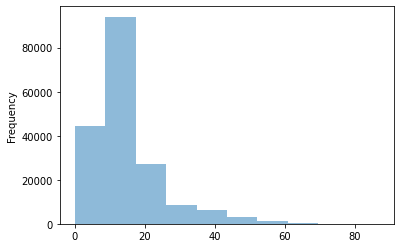

In [490]:
Dataset[Dataset['TP_SEXO'] == 2]['NU_IDADE'].plot(kind='hist',alpha=0.5, label='Mulher')

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


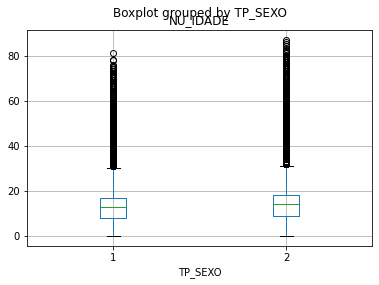

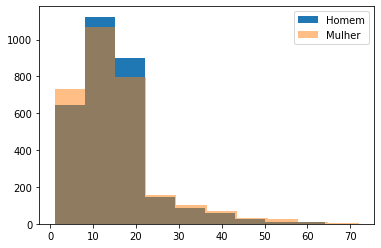

In [491]:
Dataset.boxplot(column='NU_IDADE', by='TP_SEXO')
plt.show()

Dataset1 = Dataset[Dataset['TP_SEXO'] == 1]['NU_IDADE'].sample(3000)
Dataset2 = Dataset[Dataset['TP_SEXO'] == 2]['NU_IDADE'].sample(3000)

plt.hist(Dataset1, label='Homem')
plt.hist(Dataset2, alpha=0.5, label='Mulher')
plt.legend(loc='upper right')
plt.show()

In [492]:
wval1, pval1 = stats.shapiro(Dataset1)
wval2, pval2 = stats.shapiro(Dataset2)

print(wval1)
print(pval1)
print(wval2)
print(pval2)

if pval1 < 0.05 and pval2 < 0.05: 
  # Distribuicoes normais
  print(stats.mannwhitneyu(Dataset1, Dataset2))
else:
  print(stats.ttest_ind(Dataset1, Dataset2))

0.8506419062614441
0.0
0.8409535884857178
0.0
MannwhitneyuResult(statistic=4222637.5, pvalue=3.48405669892584e-05)


Como para p > 0.05 temos que a hipótese nula é aceita, concluímos que não existe diferença nas idades entre os sexos disponiveis.

###Idade/Tipo de escola


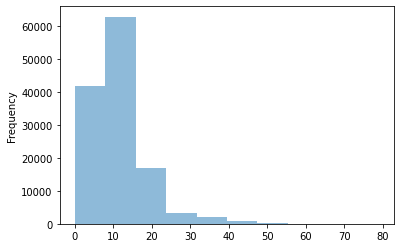

In [493]:
Dataset[Dataset['Privada'] == 1]['NU_IDADE'].plot(kind='hist',alpha=0.5,label='Homem')

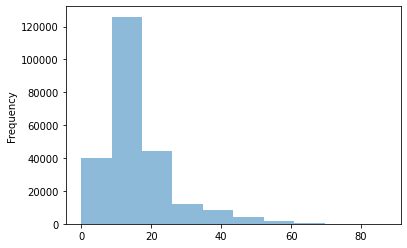

In [494]:
Dataset[Dataset['Privada'] == 0]['NU_IDADE'].plot(kind='hist',alpha=0.5, label='Mulher')

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


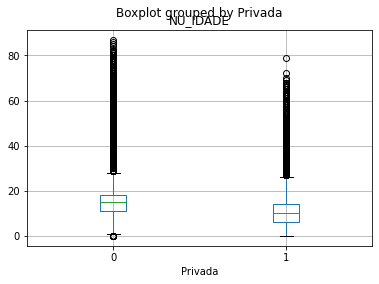

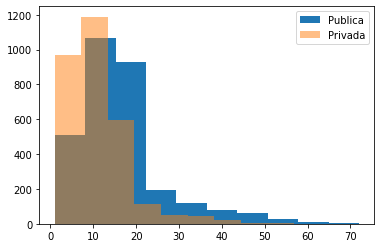

In [495]:
Dataset.boxplot(column='NU_IDADE', by='Privada')
plt.show()

Dataset1 = Dataset[Dataset['Privada'] == 0]['NU_IDADE'].sample(3000)
Dataset2 = Dataset[Dataset['Privada'] == 1]['NU_IDADE'].sample(3000)

plt.hist(Dataset1, label='Publica')
plt.hist(Dataset2, alpha=0.5, label='Privada')
plt.legend(loc='upper right')
plt.show()

In [496]:
wval1, pval1 = stats.shapiro(Dataset1)
wval2, pval2 = stats.shapiro(Dataset2)

print(wval1)
print(pval1)
print(wval2)
print(pval2)

if pval1 < 0.05 and pval2 < 0.05: 
  # Distribuicoes normais
  print(stats.mannwhitneyu(Dataset1, Dataset2))
else:
  print(stats.ttest_ind(Dataset1, Dataset2))

0.8414324522018433
0.0
0.839002251625061
0.0
MannwhitneyuResult(statistic=6304899.5, pvalue=8.226003551464617e-160)


Como para p < 0.05 temos que a hipótese nula é rejeitada, concluímos que existe diferença nas idades entre os tipos de educação (pública/privada) disponiveis.